# PROJETO SHARK ATTACK

# Research Question:  Which age group is more attacked by white shark?


In [ ]:
!pip install seaborn

In [ ]:
!pip install plotly

## Importing all libs

In [278]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [20, 12]
%config InlineBackend.figure_format = 'retina'
sns.set_style("dark")
import numpy as np
import os

## Reading a file (just to get a first view)

In [279]:
file = open('archive/attacks.csv', 'rb')
file_lines = file.readlines(10000)
for i in range(5):
    print(file_lines[i].decode('latin1'))
file.close()

Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex ,Age,Injury,Fatal (Y/N),Time,Species ,Investigator or Source,pdf,href formula,href,Case Number,Case Number,original order,,

2018.06.25,25-Jun-2018,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and paddle damaged",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.25-Wolfe.pdf,2018.06.25,2018.06.25,6303,,

2018.06.18,18-Jun-2018,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely ,F,11,Minor injury to left thigh,N,14h00  -15h00,,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.18-McNeely.pdf,2018.06.18,2018.06.18,6302,,

201

## Creating a DataFrame with Pandas

In [280]:
tb_sharkattack = pd.read_csv('archive/attacks.csv', encoding = 'latin-1' )

## Renaming messed colunms for better reading

In [281]:
dict_rename = {column : column.lower().rstrip().lstrip().replace(' ', '_').replace('.', '_').replace(':_', '_') for column in tb_sharkattack}
tb_sharkattack = tb_sharkattack.rename(dict_rename, axis = 1)
tb_sharkattack.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   case_number             8702 non-null   object 
 1   date                    6302 non-null   object 
 2   year                    6300 non-null   float64
 3   type                    6298 non-null   object 
 4   country                 6252 non-null   object 
 5   area                    5847 non-null   object 
 6   location                5762 non-null   object 
 7   activity                5758 non-null   object 
 8   name                    6092 non-null   object 
 9   sex                     5737 non-null   object 
 10  age                     3471 non-null   object 
 11  injury                  6274 non-null   object 
 12  fatal_(y/n)             5763 non-null   object 
 13  time                    2948 non-null   object 
 14  species                 3464 non-null 

## Deleting duplicated recordes on DataFrame

In [282]:
sum(~tb_sharkattack.duplicated())/sum(tb_sharkattack.duplicated())

0.325176446344856

In [283]:
tb_sharkattack = tb_sharkattack.loc[~tb_sharkattack.duplicated(),]

## Deleting collumns almost empyt and no useful information on DataFrame

In [284]:
tb_sharkattack = tb_sharkattack.drop(['unnamed_22', 'unnamed_23'], axis =1)

## Investigating collumn age, lacked and messed information

In [285]:
tb_sharkattack['age'].describe()

count     3471
unique     157
top         17
freq       154
Name: age, dtype: object

In [ ]:
tb_sharkattack['age']


In [286]:
sum(~tb_sharkattack['age'].isna()) 

3471

In [287]:
lista_age = list(tb_sharkattack.loc[(tb_sharkattack['age'].notna()) & (tb_sharkattack['age'].str.contains(r'\W|[a-z]{A-Z}')) , 'age'].unique())

In [ ]:

for i in lista_age:
    print(f"line_rename_dict['{i}']='{i}'")

    


## Fixing with a dictionary, cause of many conditions to fix

### It could better with a regular expression, but sometimes there were more than age in same records

In [288]:
line_rename_dict = dict()
line_rename_dict['40s']='45'
line_rename_dict['20s']='25'
line_rename_dict['Teen']='12'
line_rename_dict['60s']='65'
line_rename_dict['18 months']='2'
line_rename_dict['30s']='35'
line_rename_dict['50s']='55'
line_rename_dict['teen']='12'
line_rename_dict['18 or 20']='19'
line_rename_dict['12 or 13']='12'
line_rename_dict['Teens']='12'
line_rename_dict['8 or 10']='9'
line_rename_dict['30 or 36']='33'
line_rename_dict['33 or 37']='35'
line_rename_dict['mid-30s']='35'
line_rename_dict['60']='65'
line_rename_dict['16 to 18']='17'
line_rename_dict['Elderly']='65'
line_rename_dict['mid-20s']='25'
line_rename_dict['Ca. 33']='33'
line_rename_dict['21 or 26']='23'
line_rename_dict['18 to 22']='20'
line_rename_dict['adult']='21'
line_rename_dict['9 months']='1'
line_rename_dict['25 to 35']='30'
line_rename_dict['(adult)']='21'
line_rename_dict['25 or 28']='26'
line_rename_dict['X']='check'
line_rename_dict['"middle-age"']='40'
line_rename_dict['13 or 18']='15'
line_rename_dict['2 to 3 months']='1'
line_rename_dict['MAKE LINE GREEN']='check'
line_rename_dict['"young"']='18'
line_rename_dict['7 or 8']='8'
line_rename_dict['F']='check'
line_rename_dict['Both 11']='11'
line_rename_dict['9 or 10']='10'
line_rename_dict['young']='18'
line_rename_dict['A.M.']='check'
line_rename_dict['28 & 26']='27'
line_rename_dict['10 or 12']='11'
line_rename_dict['31 or 33']='32'
line_rename_dict['13 or 14']='13'
line_rename_dict['28 & 26']='27'
line_rename_dict['46 & 34']='40'
line_rename_dict['28, 23 & 30']='27'
line_rename_dict['36 & 26']='32'
line_rename_dict['21 & ?']='21'
line_rename_dict['23 & 20']='22'
line_rename_dict['7      &    31']='check'
line_rename_dict['32 & 30']='31'
line_rename_dict['9 & 12']='10'
line_rename_dict['? & 19']='19'
line_rename_dict['23 & 26']='25'
line_rename_dict['33 & 37']='35'
line_rename_dict['37, 67, 35, 27,  ? & 27']='check'
line_rename_dict['21, 34,24 & 35']='check'
line_rename_dict['30 & 32']='30 & 32'
line_rename_dict['50 & 30']='check'
line_rename_dict['17 & 35']='check'
line_rename_dict['34 & 19']='check'
line_rename_dict['33 & 26']='28'
line_rename_dict['17 & 16']='17'
line_rename_dict['36 & 23']='check'
line_rename_dict['?    &   14']='14'
line_rename_dict['\xa0 ']='check'
line_rename_dict[' ']='check'
line_rename_dict['']='check'
line_rename_dict['20?']='check'
line_rename_dict["60's"]='65'
line_rename_dict['>50']='50'                 


## Creating a new collum called "new_age"

In [289]:
tb_sharkattack['new_age'] = tb_sharkattack['age']


## Creating a Function for mapping Age collum and assigned the right value to new_age

In [290]:

def atualiza_age(x):
    try:
        x = x.rstrip().lstrip()
        if x.isnumeric():
            value = int(x)
            return(value)
        else:
            value = line_rename_dict[x]
            if value == 'check':
                return value
            return int(value)
    
    except ValueError as e:
        return np.nan

tb_sharkattack['new_age'] = tb_sharkattack['new_age'].map(atualiza_age, na_action='ignore')



In [291]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 33)


In [ ]:
tb_sharkattack

## Some cases checked as "check" in new_age  was deleting and new_age was converted to int64 type

### After, ivestigating those cases marked as checked, I deleted them. It was 16 records

In [302]:
tb_sharkattack = tb_sharkattack[tb_sharkattack['new_age'] != 'check']
tb_sharkattack = tb_sharkattack[tb_sharkattack['new_age'].notna()]
sum(tb_sharkattack['new_age'].isna())

C:\datascience\anaconda\software\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



0

In [301]:
tb_sharkattack['new_age'] = tb_sharkattack['new_age'].astype('int64')

## Regognizing species on DataFrame, based on print,  creating an excel file to fix 

### It was an hard job. Species totally messed and ambigous. So I need to check uniques and knowing which especies were more import to create an excel file

In [ ]:
for i in list(tb_sharkattack['species'].unique()):
    print (i)

In [293]:
tb_sharkattack['species_cons'] = 'not_identified'

## Based on excel file of scpecies, was created a new DataFrame

In [303]:
tb_sharkattack_species = pd.read_excel('archive/especies.xlsx' )

In [ ]:
tb_sharkattack_species['species']

## Merging both to create a new one called "tb_sharkattack_new" 

In [304]:
tb_sharkattack_new = tb_sharkattack.merge(tb_sharkattack_species, on = 'species')

In [305]:
tb_sharkattack_new = tb_sharkattack_new.drop(['species_cons_x'], axis=1)

In [306]:
tb_sharkattack_new = tb_sharkattack_new.rename({'species_cons_y': 'species_cons'}, axis =1)

In [277]:
tb_sharkattack_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3452 entries, 0 to 3451
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   case_number             3452 non-null   object 
 1   date                    3452 non-null   object 
 2   year                    3451 non-null   float64
 3   type                    3451 non-null   object 
 4   country                 3443 non-null   object 
 5   area                    3335 non-null   object 
 6   location                3302 non-null   object 
 7   activity                3311 non-null   object 
 8   name                    3441 non-null   object 
 9   sex                     3416 non-null   object 
 10  age                     3452 non-null   object 
 11  injury                  3447 non-null   object 
 12  fatal_(y/n)             3228 non-null   object 
 13  time                    2346 non-null   object 
 14  species                 2182 non-null   

## Agregating count and mean  age of victims per species 

In [307]:
tb_age = tb_sharkattack_new.groupby('species_cons').agg(
    med_age = pd.NamedAgg('new_age', 'mean'),
    count_attack = pd.NamedAgg('new_age', 'count')
    
).sort_values('med_age')

In [308]:
pd.set_option('display.max_rows', 80)

In [ ]:
tb_age

In [ ]:
tb_sharkattack_new['species_cons'].value_counts()


## Merging   tb_sharkattack_new to tb_age

In [309]:
tb_sharkattack_new = tb_sharkattack_new.merge(tb_age, on = 'species_cons')

In [310]:
tb_activity = tb_sharkattack_new['activity'].dropna()

In [311]:
tb_activity = tb_activity.reset_index()


In [312]:
tb_activity['activity'].value_counts()

Surfing                                                                                                    778
Swimming                                                                                                   560
Spearfishing                                                                                               221
Fishing                                                                                                    128
Wading                                                                                                     122
                                                                                                          ... 
Surfing amid a shoal of sharks                                                                               1
Survived crash of two-engine  C-46 transport plane carrying 62 migrant workers from Puerto Rico to USA       1
Floating near boat & observing bioluminesce                                                                  1
C

## Fixing name of actictivies on DataFrame

In [313]:

def atualiza_activity(x):
    try:
        
        import re
        valor_x = x
        line_rename_dict = dict()
        line_rename_dict["[Ss][Ww][Ii][Mm]"]='swimming'
        line_rename_dict["[Ss][Uu][Rr][Ff]"]='surfing'
        line_rename_dict["[Ff][Ii][Ss][Hh]"]='fishing'
        line_rename_dict["[bB][Oo][Dd][Yy]"]='body'
        line_rename_dict["[Dd][Ii][Vv][Ii]"]='diving'
        line_rename_dict["[Bb][Aa][Tt][Hh]"]='bathing'
        line_rename_dict["[Ww][Aa][Dd][Ii]"]='wading'
        line_rename_dict["[Ss][Tt][Aa][Nn]"]='standing'
       
                       
        for i in line_rename_dict.keys():
            match = re.search("%s" % i, x)
          
            if match != None:
       
                valor_x = line_rename_dict[i]
            
        return valor_x
          
   
    except ValueError as e:
        return np.nan

tb_sharkattack_new['activity_cons'] = tb_sharkattack_new['activity'].map(atualiza_activity, na_action='ignore')

In [ ]:
tb_sharkattack_new


## Agregating mean e amount of age  per activity 

In [314]:
tb_age_activity = tb_sharkattack_new.groupby('activity_cons').agg(
    med_age_activity = pd.NamedAgg('new_age', 'mean'),
    count_attack_activity = pd.NamedAgg('new_age', 'count')
    
).sort_values('med_age_activity')

In [315]:
tb_age_activity.sort_values(by = 'count_attack_activity', ascending=False)

,med_age_activity,count_attack_activity
activity_cons,,
surfing,26.386697,887
swimming,26.014430,693
fishing,31.359841,503
diving,32.468439,301
wading,25.601399,143
...,...,...
Finning the shark,20.000000,1
Accidentally stood on hooked shark's tail before attempting to gut it,20.000000,1
Lifeboat capsized,20.000000,1


## Merging tb_age_activit to tb_sharkattack_new

In [316]:
tb_sharkattack_new = tb_sharkattack_new.merge(tb_age_activity, on = 'activity_cons')

In [ ]:
tb_sharkattack_new

In [ ]:
#tb_sharkattack_new.loc[filter_white, 'activity_cons'].value_counts()

In [ ]:
tb_sharkattack_new.describe()

In [ ]:
tb_sharkattack_new.loc[filter_white].describe()


In [348]:
tb_sharkattack_new['new_age'].mean()

27.46360616128058

In [362]:
tb_sharkattack_new.shape

(3311, 30)

## Export the DataFrame to tb_sharkattack_new.csv

In [363]:
tb_sharkattack_new.to_csv('archive/tb_sharkattack_new.csv', encoding='utf-8')

## Creating some Masks to analysis 

In [317]:
filter_surf = (tb_sharkattack_new['activity'].str.contains(r'[Ss][uU][Rr][Ff]') & tb_sharkattack_new['activity'].notna())
filter_white = tb_sharkattack_new['species_cons'] == 'white'
filter_tiger = tb_sharkattack_new['species_cons'] == 'tiger'
filter_bull = tb_sharkattack_new['species_cons'] == 'bull'
filter_blacktip = tb_sharkattack_new['species_cons'] == 'blacktip'
filter_nurse = tb_sharkattack_new['species_cons'] == 'nurse'


filter_swimming = tb_sharkattack_new['activity_cons'] == 'swimming'
filter_surfing = tb_sharkattack_new['activity_cons'] == 'surfing'
filter_fishing = tb_sharkattack_new['activity_cons'] == 'fishing'
filter_diving = tb_sharkattack_new['activity_cons'] == 'diving'
filter_wading = tb_sharkattack_new['activity_cons'] == 'wading'


In [ ]:
tb_sharkattack_new.corr()


## First view about age

Text(0.5, 1.0, 'Distribuição da Idade das Vitimas')

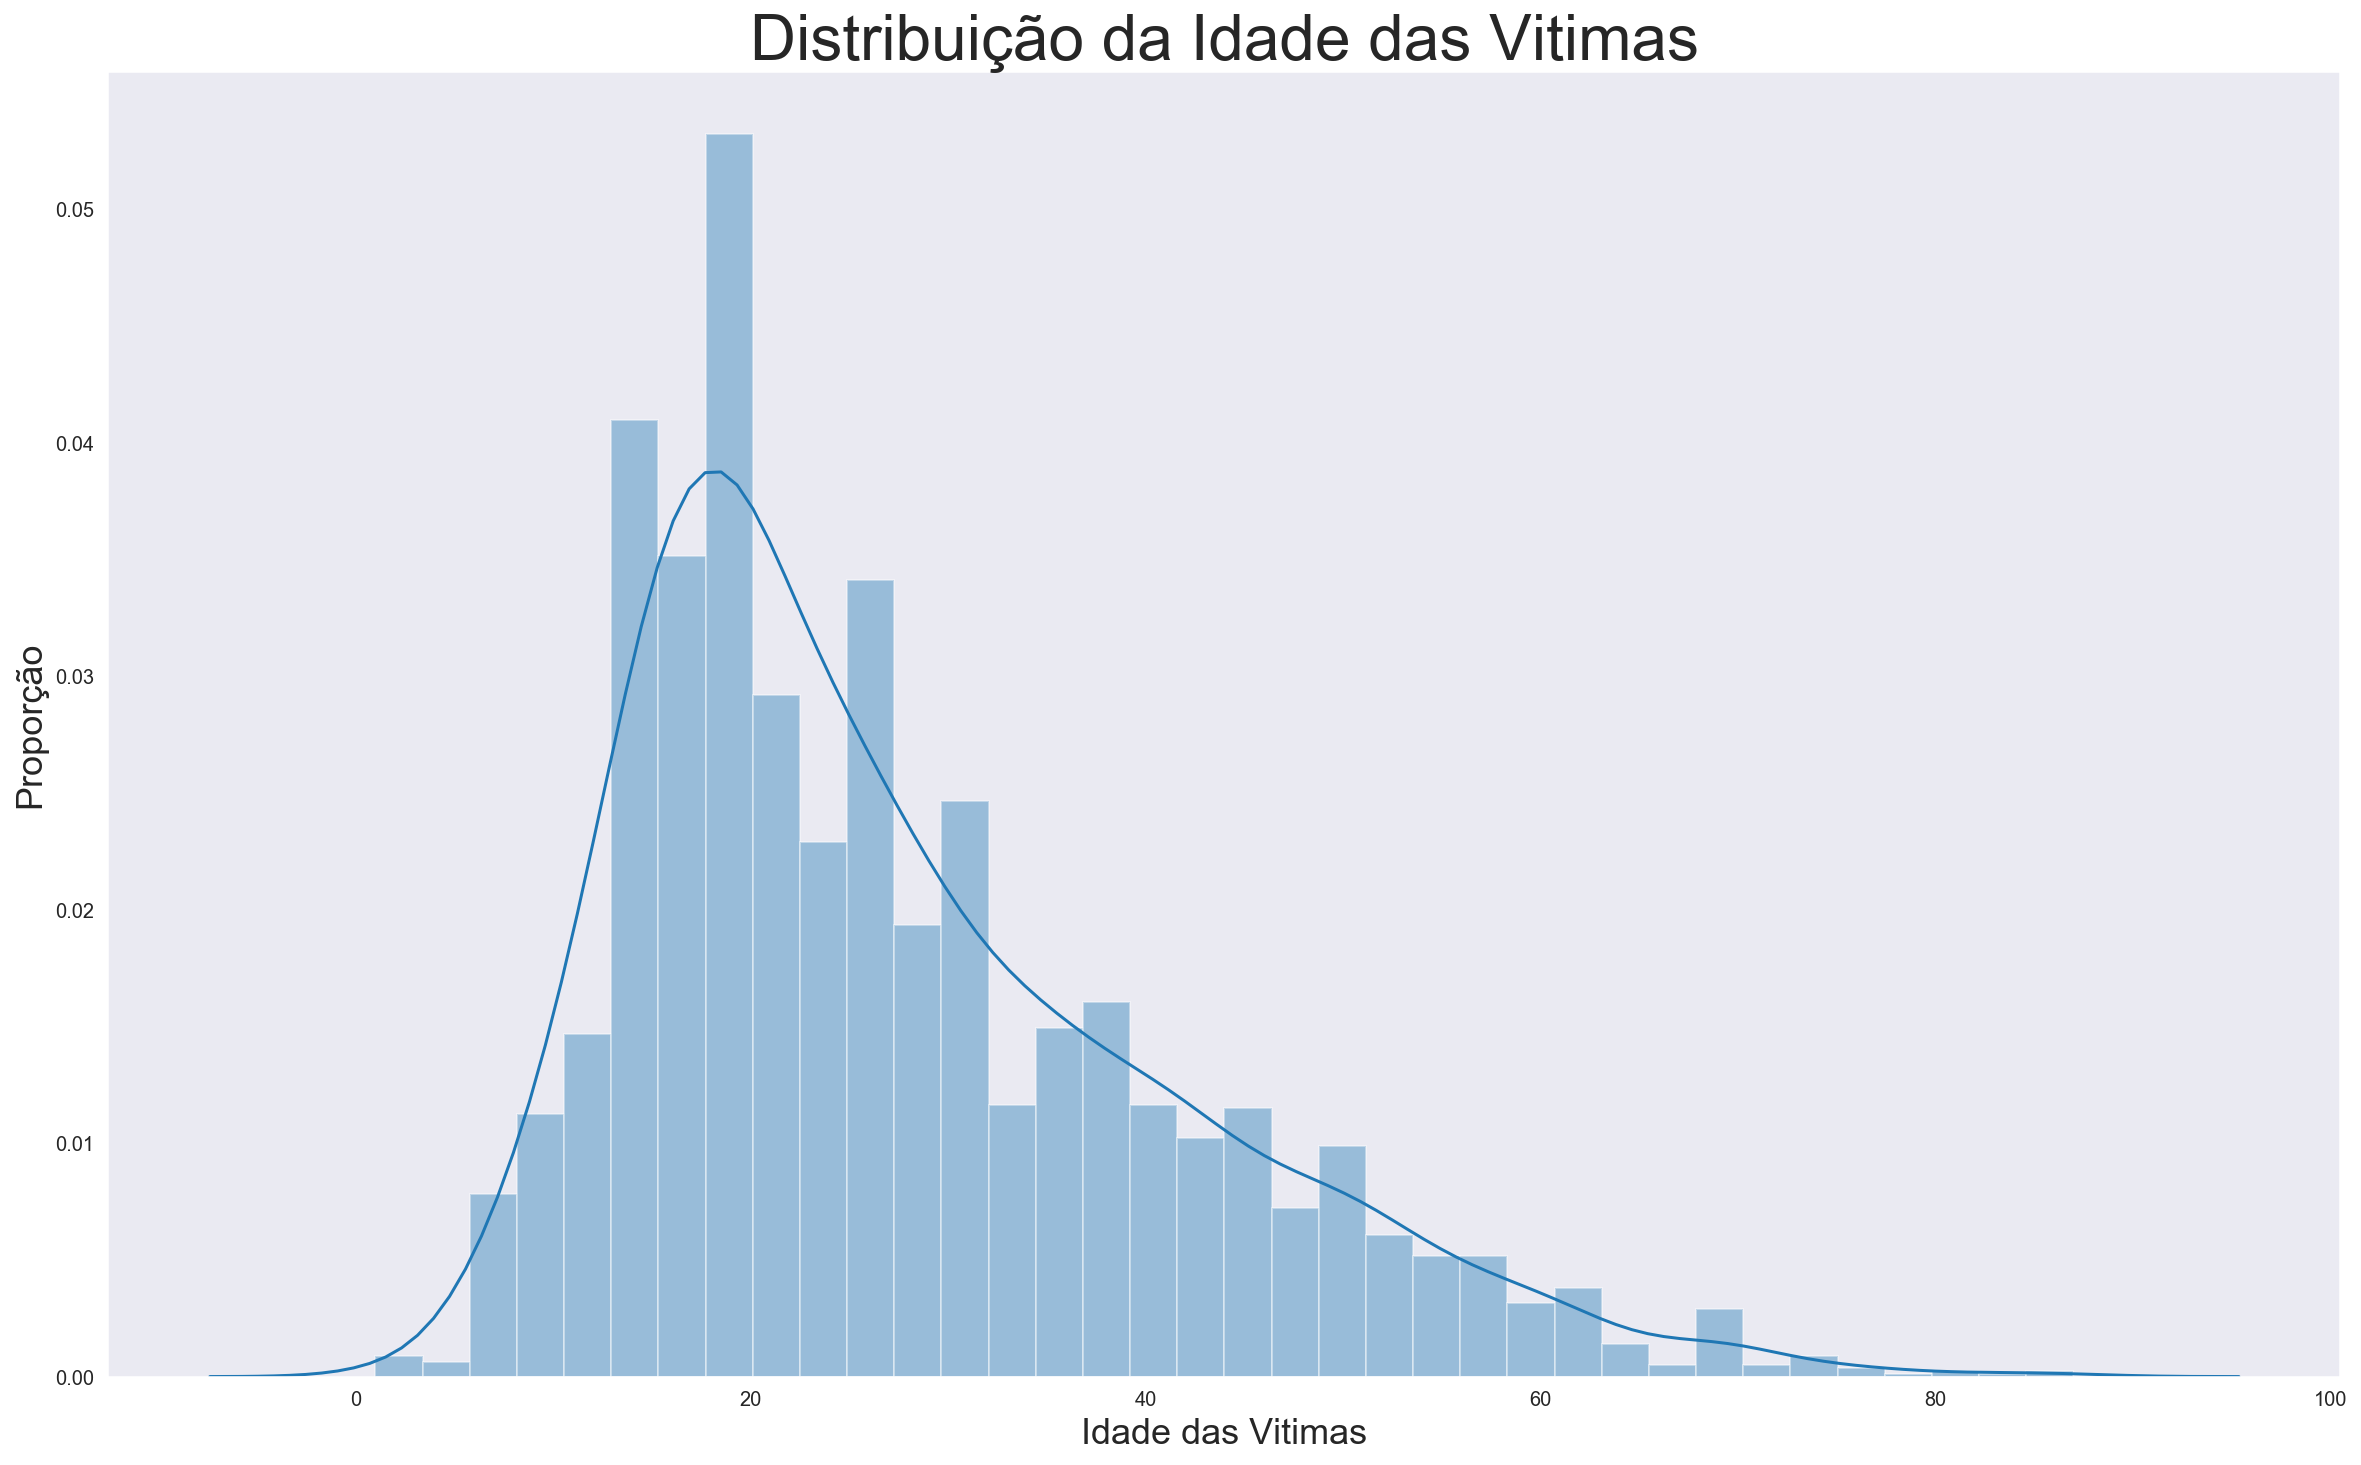

In [318]:
fig = sns.distplot(tb_sharkattack_new['new_age'])
ax = fig.axes

ax.set_xlabel( "Idade das Vitimas" , size = 18 ) 
ax.set_ylabel( "Proporção" , size = 18 ) 
ax.set_title( "Distribuição da Idade das Vitimas" , size = 32 ) 



Text(0.5, 1.0, 'Distribuição da Idade Media po Especie')

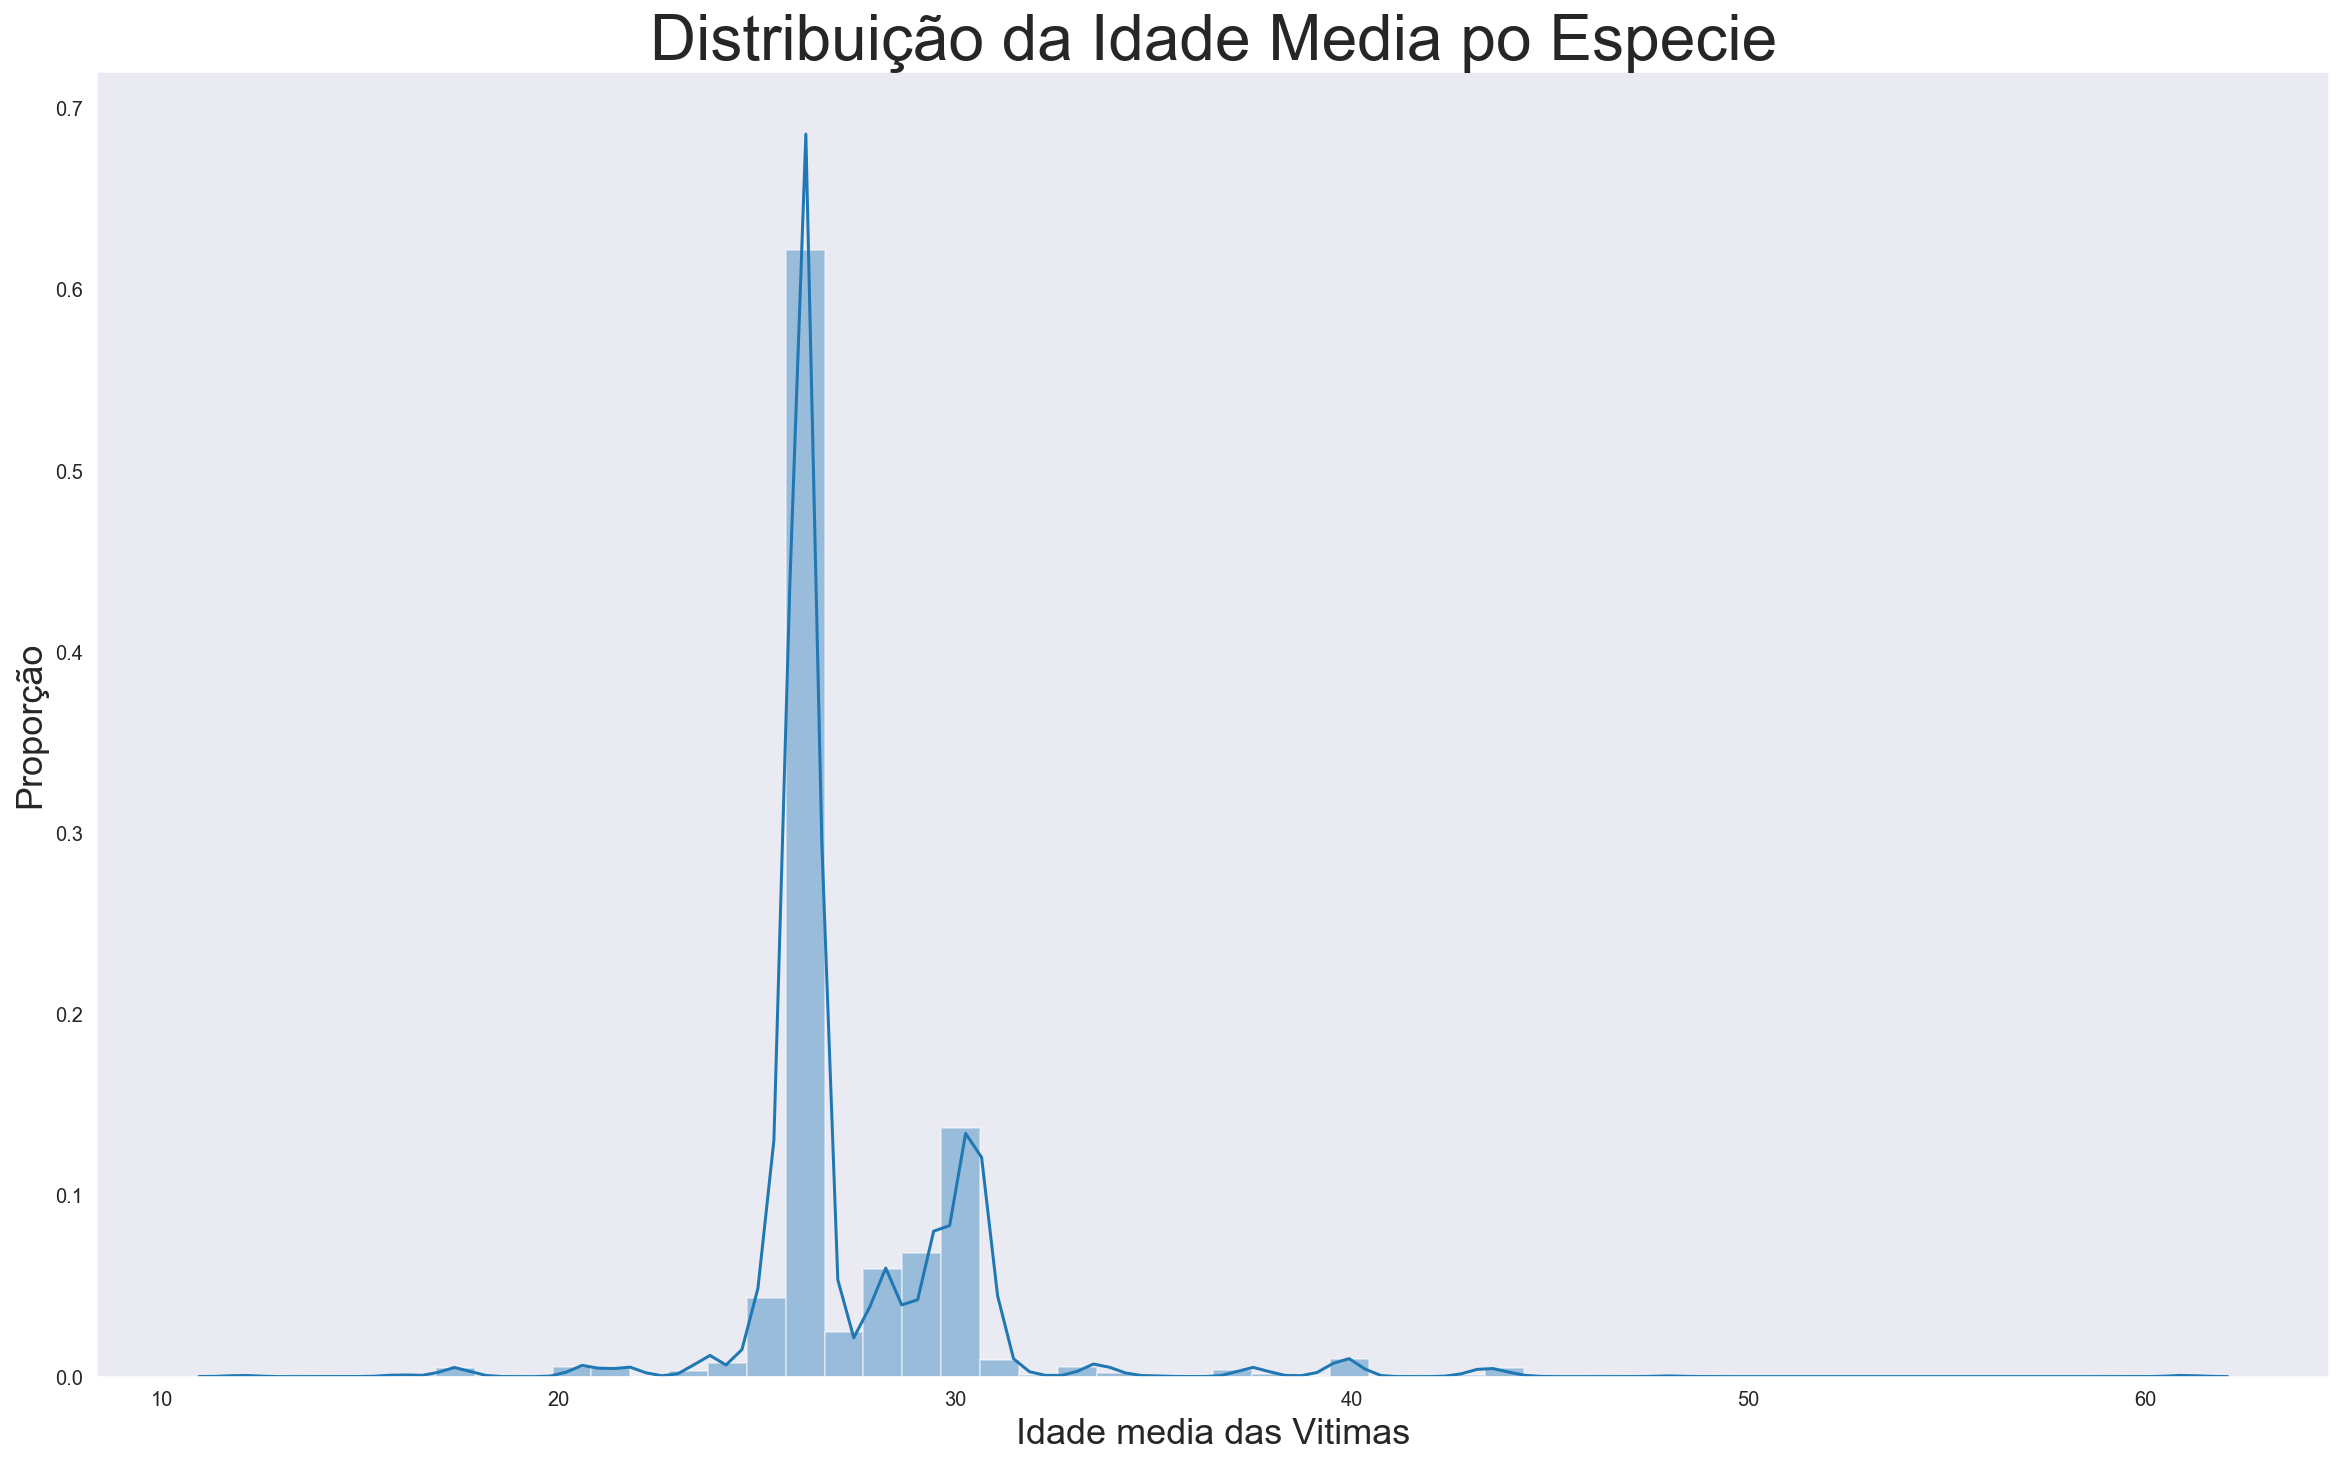

In [319]:
fig = sns.distplot(tb_sharkattack_new['med_age'])
ax = fig.axes

ax.set_xlabel( "Idade media das Vitimas" , size = 18 ) 
ax.set_ylabel( "Proporção" , size = 18 ) 
ax.set_title( "Distribuição da Idade Media po Especie" , size = 32 ) 

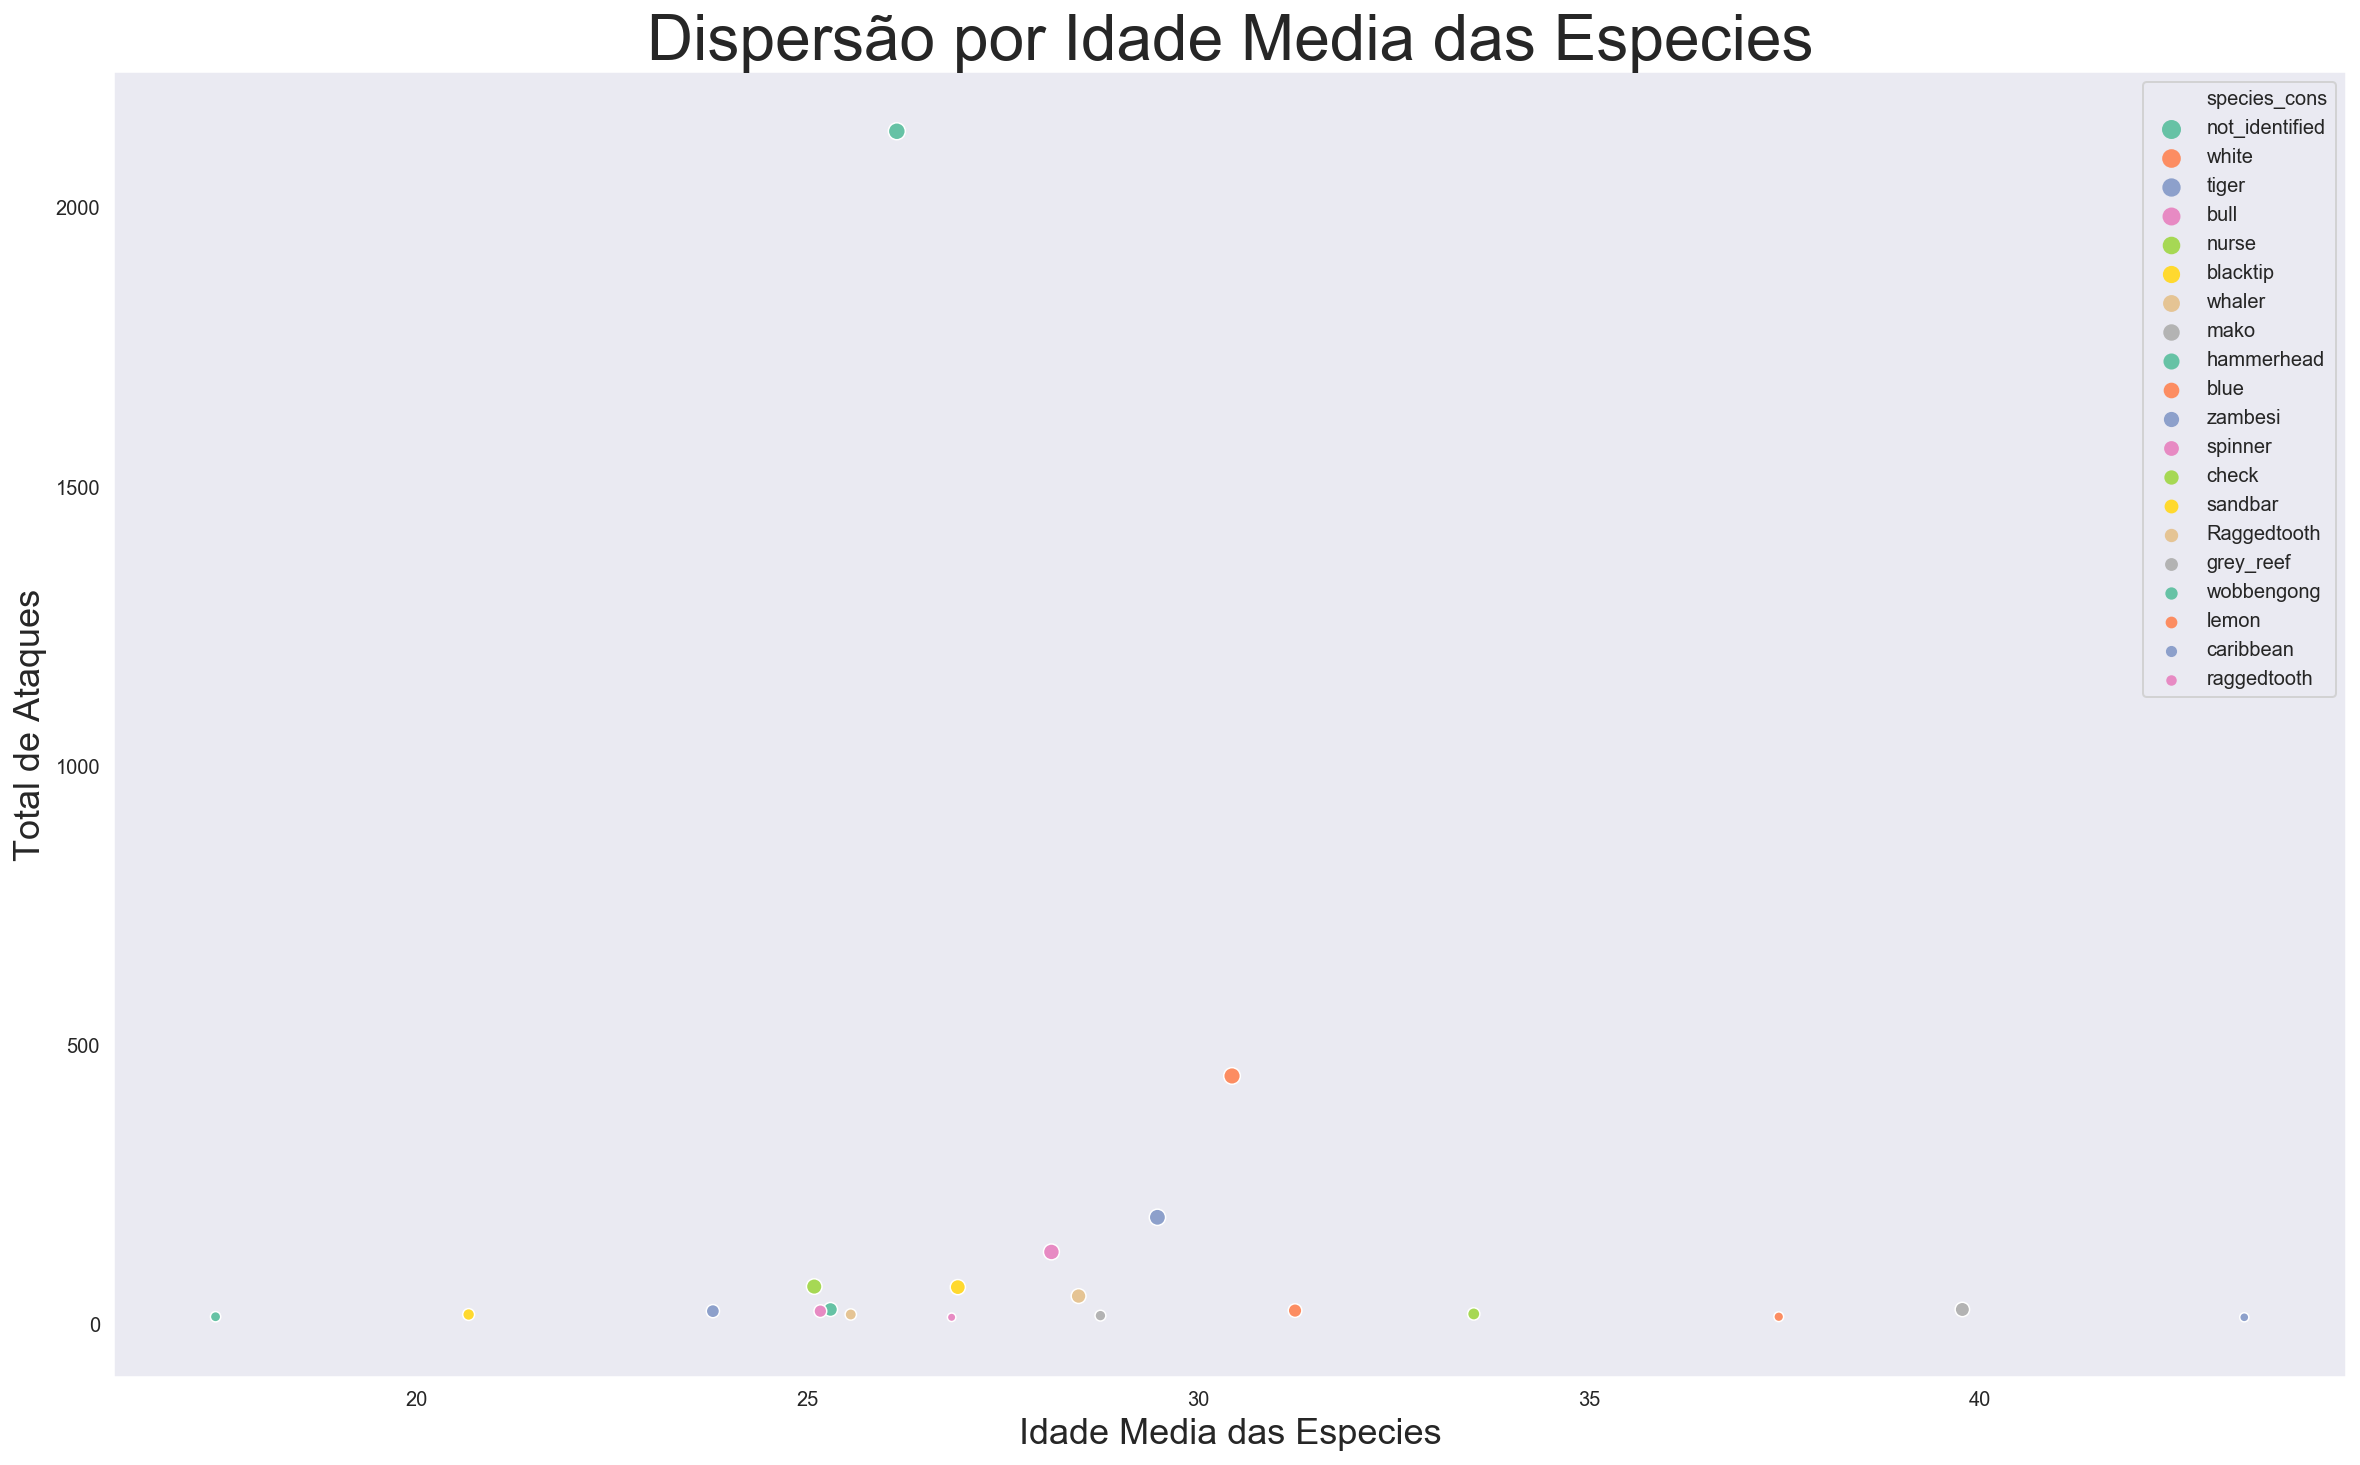

In [321]:
g = sns.scatterplot(x="med_age", y="count_attack", 
                    data=tb_species_estudo.sort_values(by=['count_attack'], ascending=False).head(20),
                    hue="species_cons",
                    palette = "Set2",
                    size = "species_cons",
                    legend='brief')
g.set_title("Dispersão dos Ataques pela Media da Idade")


g.set_xlabel( "Idade Media das Especies" , size = 18 ) 
g.set_ylabel( "Total de Ataques" , size = 18 ) 
g.set_title( "Dispersão por Idade Media das Especies" , size = 32 ) 

plt.show()

Text(0.5, 1.0, 'Distribuição da Idade das Vitimas do Tubarão Branco')

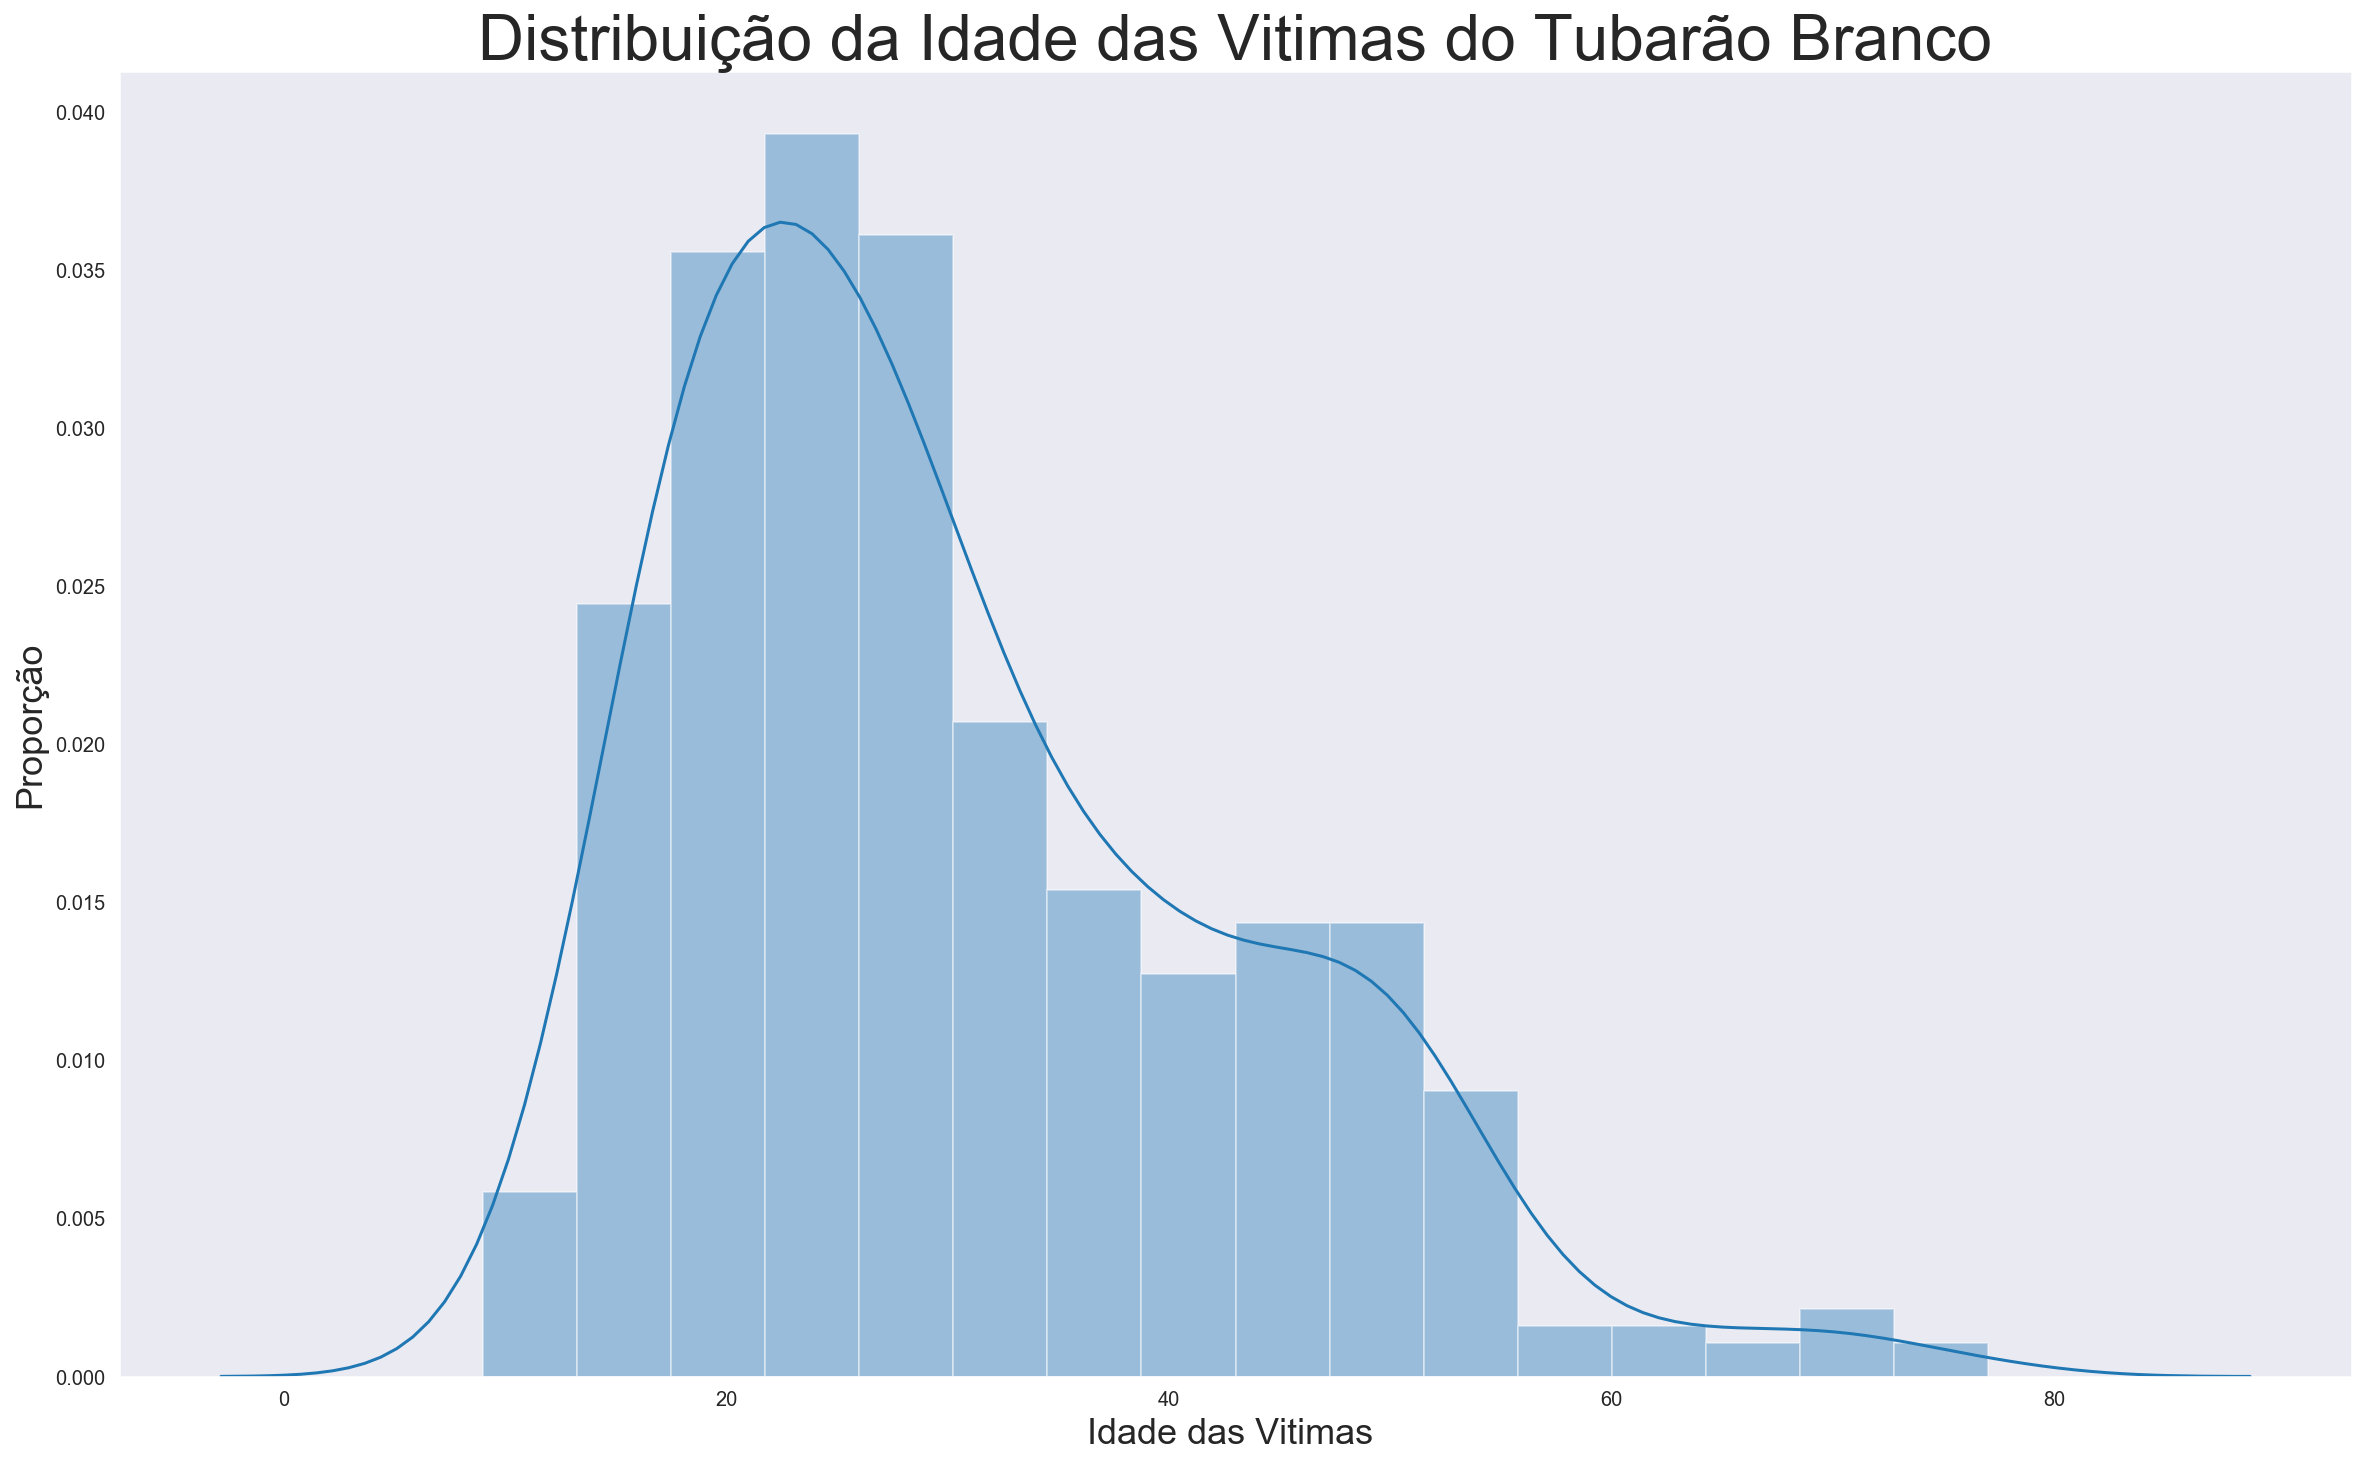

In [202]:
fig = sns.distplot(tb_sharkattack_new.loc[filter_white,'new_age'])
ax = fig.axes

ax.set_xlabel( "Idade das Vitimas " , size = 18 ) 
ax.set_ylabel( "Proporção" , size = 18 ) 
ax.set_title( "Distribuição da Idade das Vitimas do Tubarão Branco" , size = 32 ) 


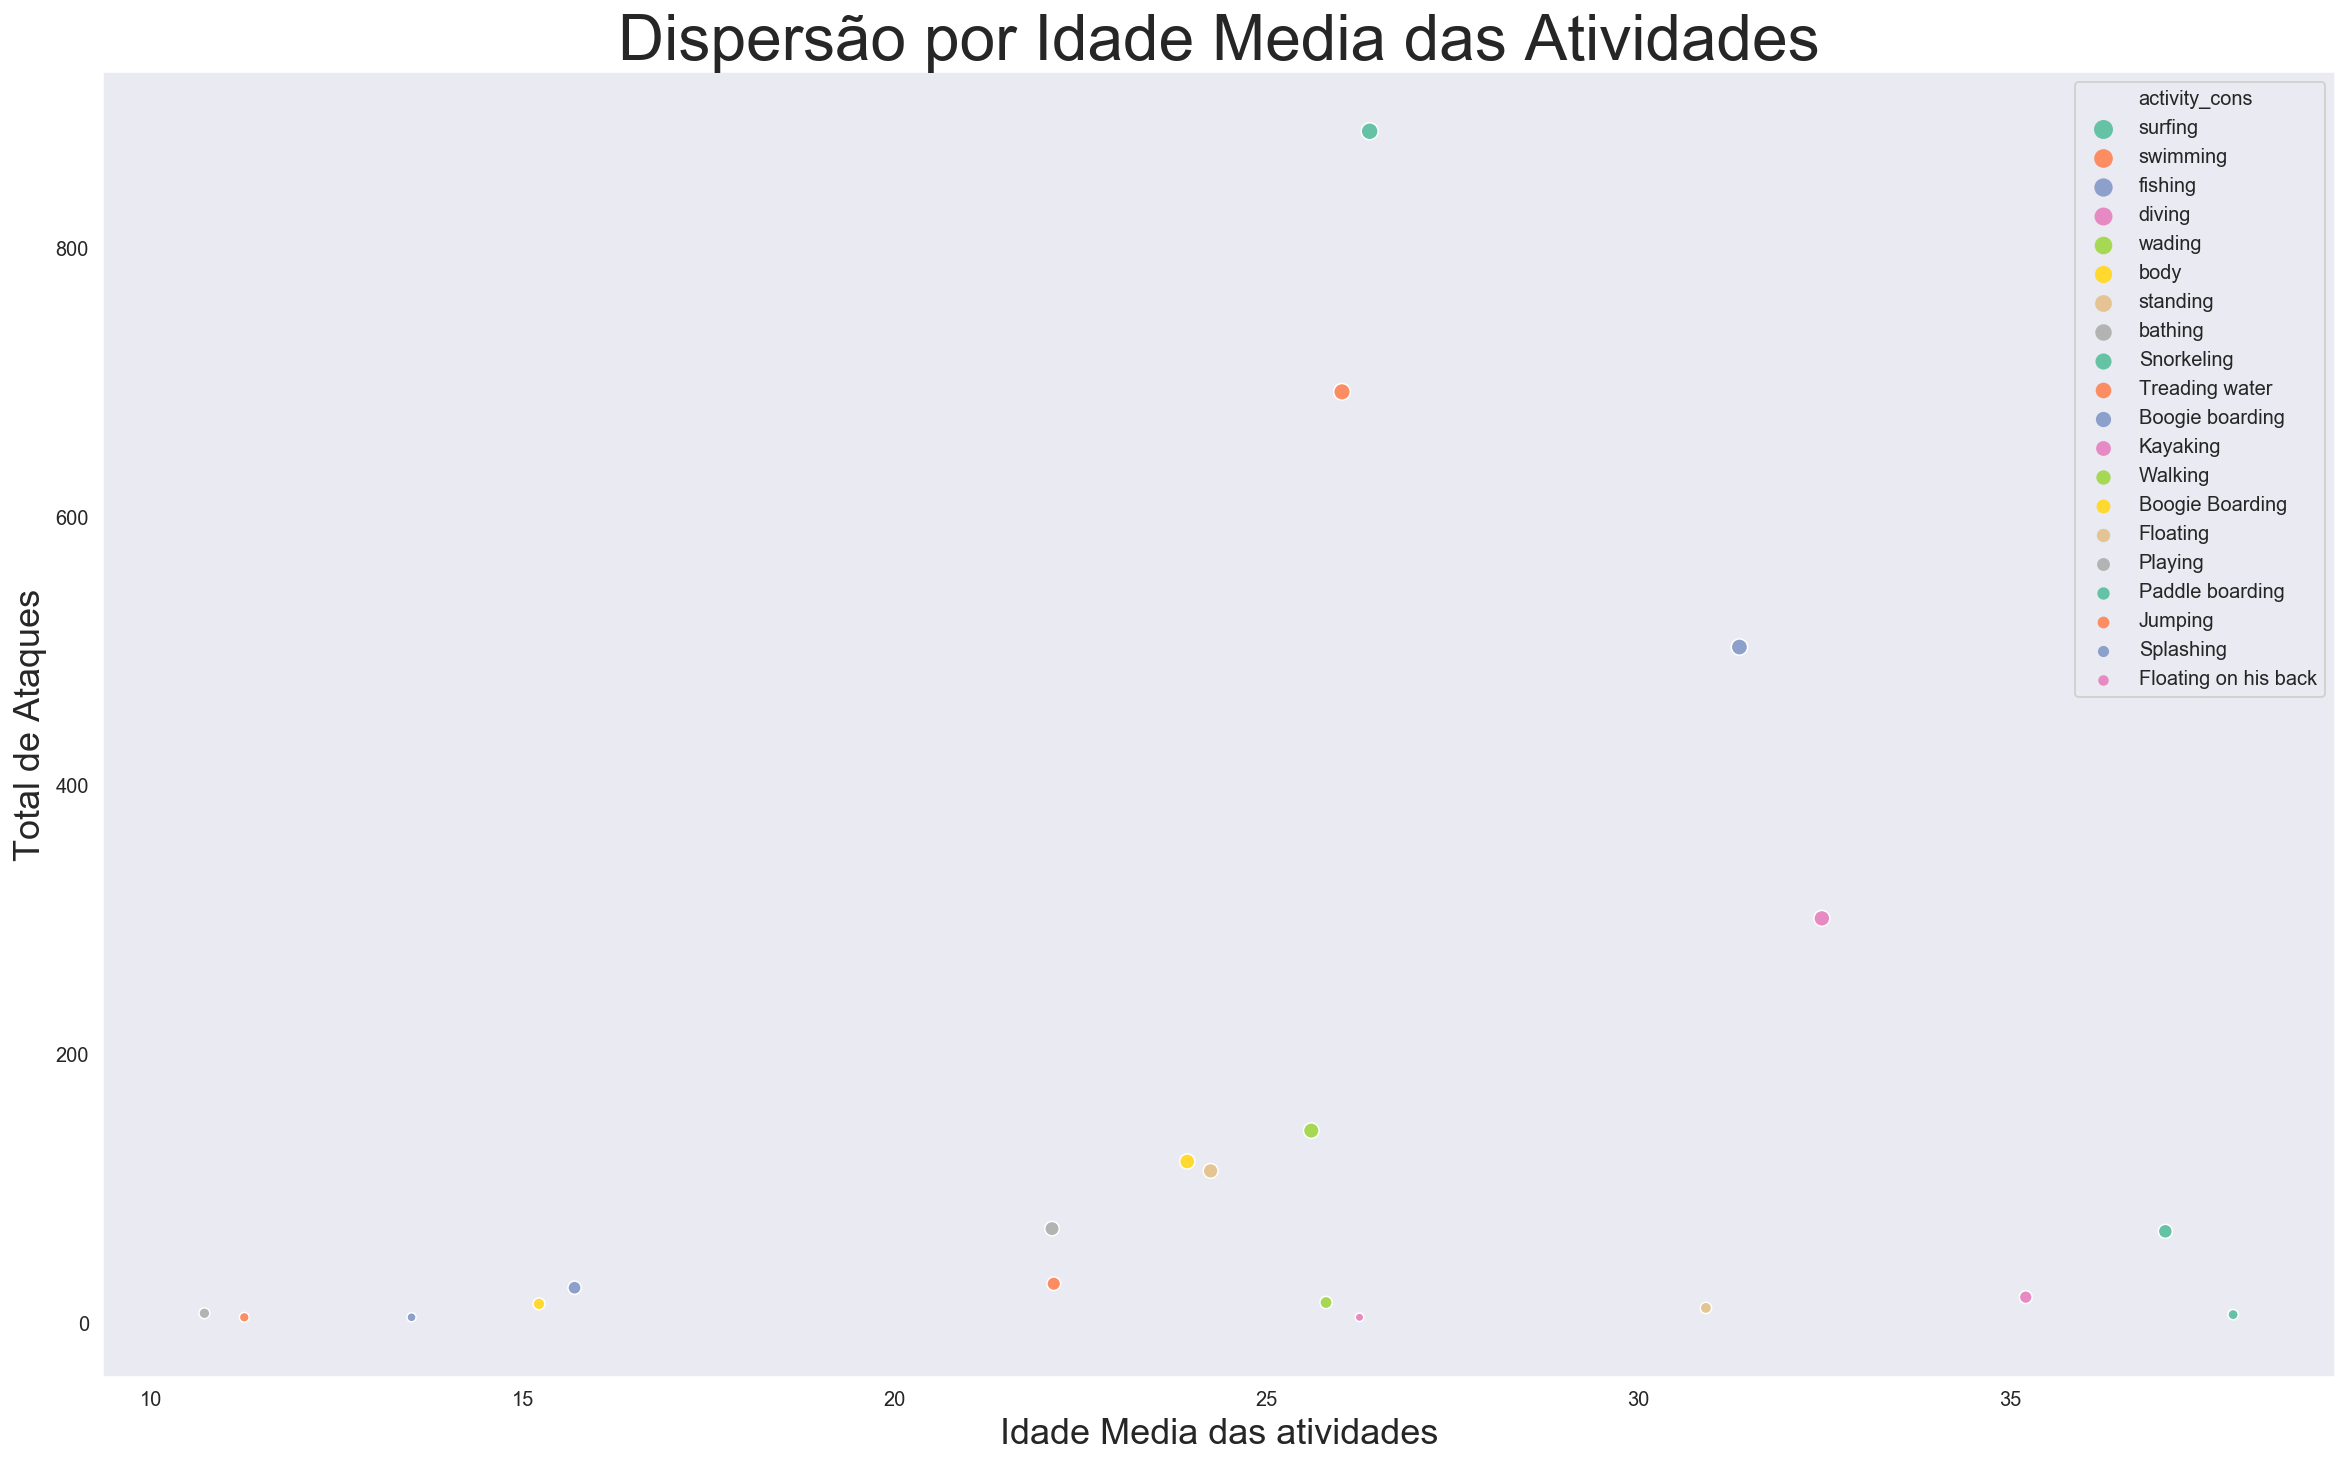

In [322]:
yx = sns.scatterplot(x="med_age_activity", y="count_attack_activity", 
                    data= tb_activity_estudo.sort_values(by=['count_attack_activity'], ascending=False).head(20),
                    hue="activity_cons",
                    palette = "Set2",
                    size = "activity_cons",
                    )

yx.set_xlabel( "Idade Media das atividades" , size = 18 ) 
yx.set_ylabel( "Total de Ataques" , size = 18 ) 
yx.set_title( "Dispersão por Idade Media das Atividades" , size = 32 ) 




plt.show()

Text(0.5, 1.0, 'Distribuição das Atividades Vitimas do Tubarão Branco')

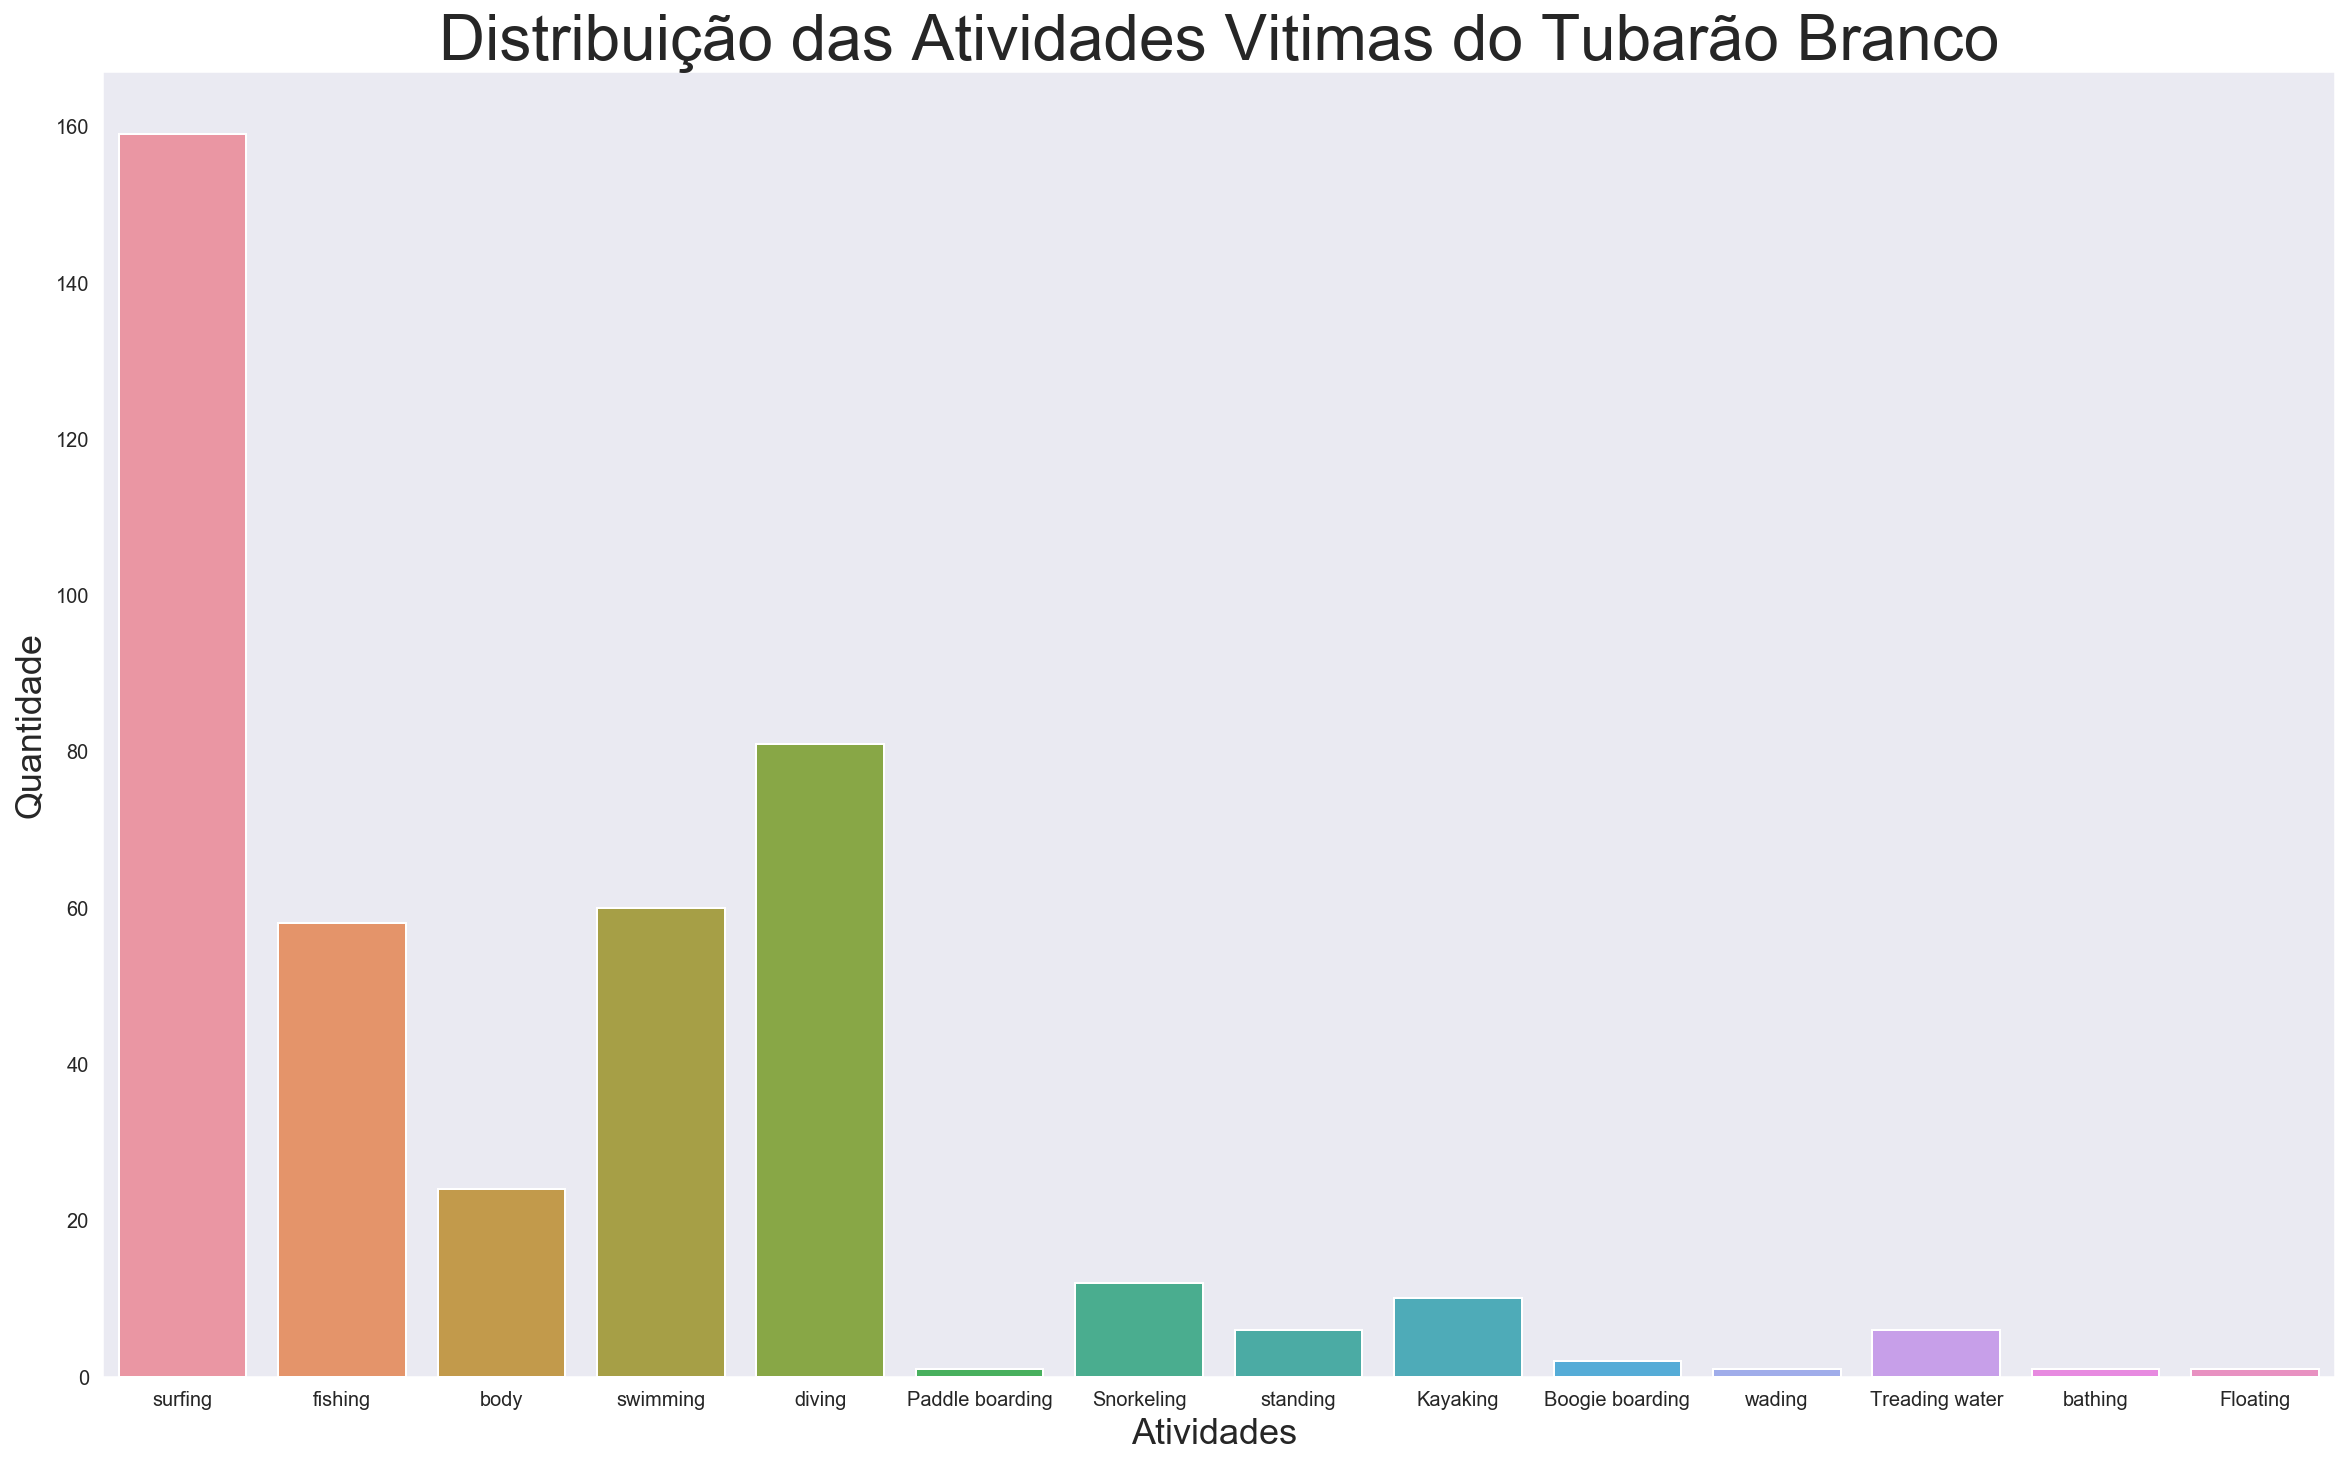

In [225]:
fig = sns.countplot(tb_sharkattack_new.loc[((filter_white) & (tb_sharkattack_new['count_attack_activity'] > 5)),'activity_cons'])
ax = fig.axes

ax.set_xlabel( "Atividades " , size = 18 ) 
ax.set_ylabel( "Quantidade" , size = 18 ) 
ax.set_title( "Distribuição das Atividades Vitimas do Tubarão Branco" , size = 32 ) 

In [358]:
tb_sharkattack_new['activity_cons'].value_counts()

surfing                                                                                    887
swimming                                                                                   693
fishing                                                                                    503
diving                                                                                     301
wading                                                                                     143
                                                                                          ... 
Floating with life preserver after his boat foundered                                        1
Adrift after ditching plane in the sea                                                       1
Pulling raft out to ride to shore                                                            1
14 m prawn trawler New Venture capsized  & sank in heavy seas Three people in the water      1
Attempting to illegally enter the USA             

## Fisrt view of mean Age per species 

In [343]:
tb_species_estudo = tb_sharkattack_new[['species_cons','med_age','count_attack']]
tb_species_estudo = tb_species_estudo.groupby('species_cons').first()
tb_species_estudo ['percent'] = tb_species_estudo ['count_attack'] / tb_sharkattack_new.shape[0] *100
tb_species_estudo.sort_values(by=['count_attack'], ascending=False).head(10)

,med_age,count_attack,percent
species_cons,,,
not_identified,26.145131,2136,64.512232
white,30.433708,445,13.440048
tiger,29.479167,192,5.798852
bull,28.123077,130,3.926306
nurse,25.088235,68,2.053760
blacktip,26.925373,67,2.023558
whaler,28.470588,51,1.540320
mako,39.777778,27,0.815464
hammerhead,25.296296,27,0.815464


In [325]:
tb_species_estudo = tb_species_estudo.reset_index()

Text(0, 0.5, 'Quantidade')

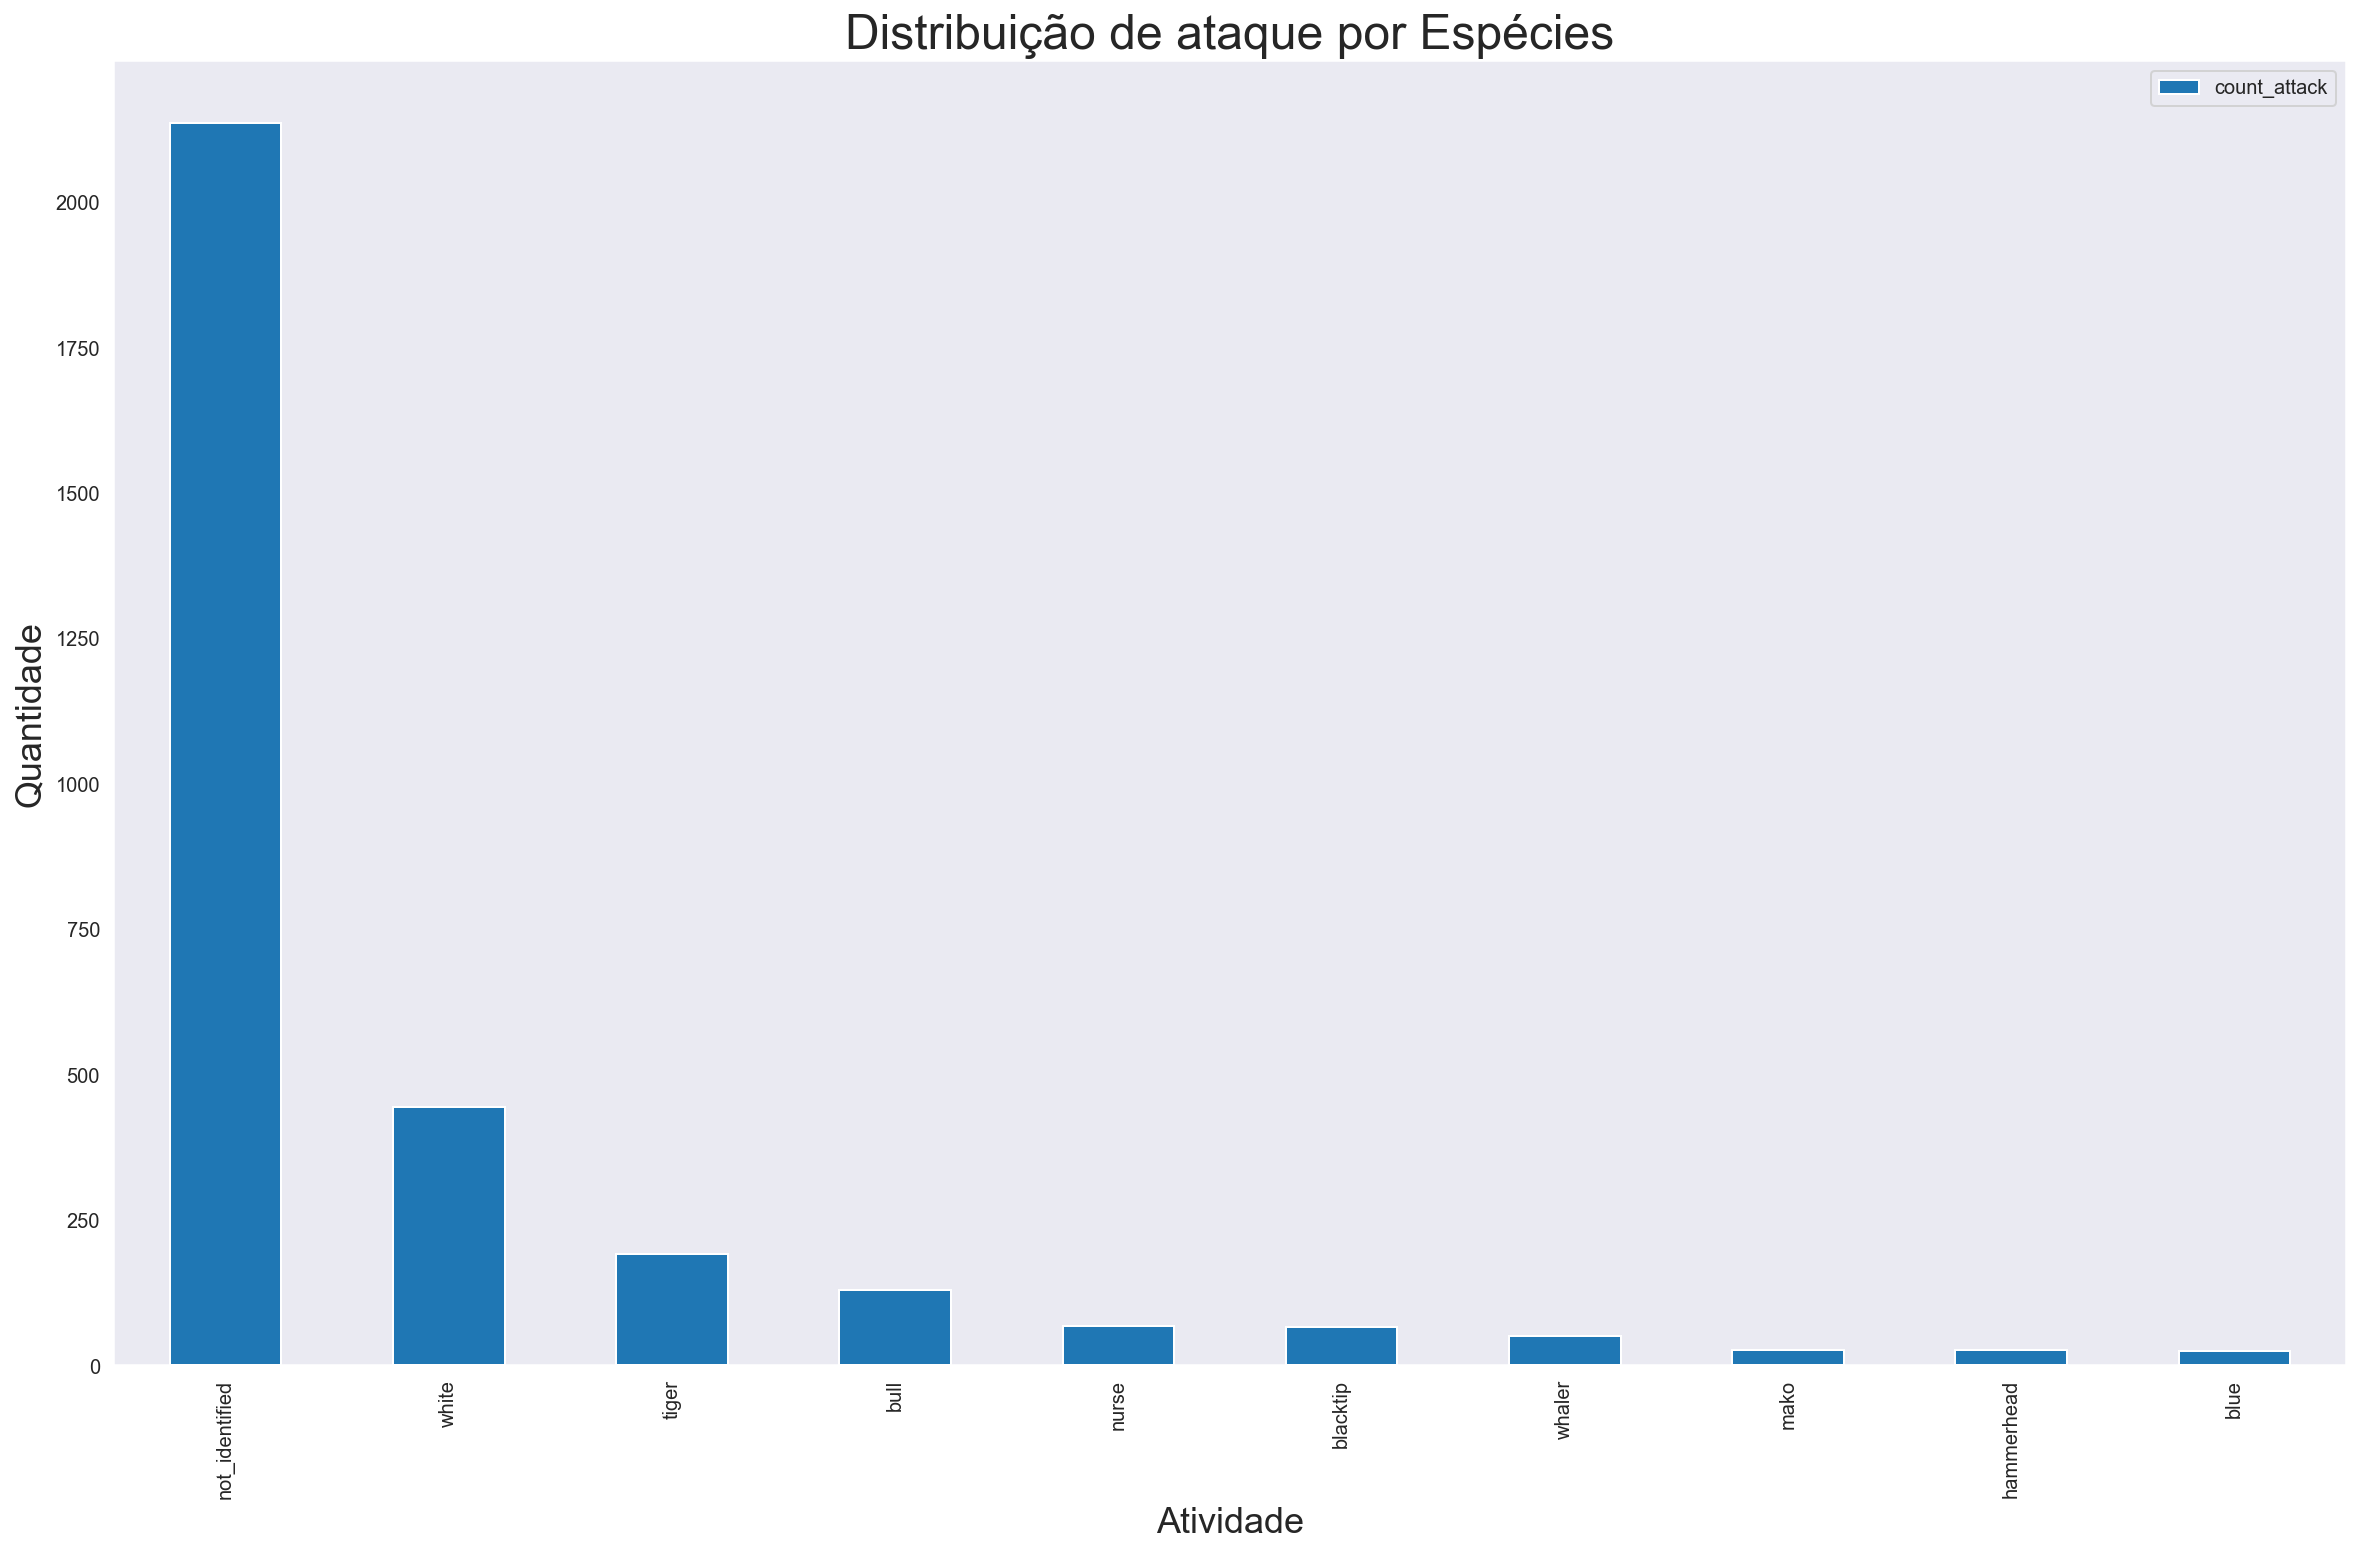

In [326]:
tb_species_estudo.sort_values(by=['count_attack'], ascending=False).head(10).plot.bar(x="species_cons", y='count_attack' )
plt.title("Distribuição de ataque por Espécies", fontsize='24')
plt.xlabel("Atividade", fontsize='18')
plt.ylabel("Quantidade", fontsize='18')

#### In many cases, the species weren´t regonized. In many of them, the ressearch could identify based on pattern of biting 

## Fisrt view of mean Age per Activity

In [347]:
tb_activity_estudo = tb_sharkattack_new[['activity_cons','med_age_activity','count_attack_activity']]
tb_activity_estudo = tb_activity_estudo.groupby('activity_cons').first()
tb_activity_estudo ['percent'] = tb_activity_estudo ['count_attack_activity'] / tb_sharkattack_new.shape[0] *100
tb_activity_estudo.sort_values(by=['count_attack_activity'], ascending=False).head(10)

,med_age_activity,count_attack_activity,percent
activity_cons,,,
surfing,26.386697,887,26.789490
swimming,26.014430,693,20.930233
fishing,31.359841,503,15.191785
diving,32.468439,301,9.090909
wading,25.601399,143,4.318937
body,23.933333,120,3.624283
standing,24.247788,113,3.412866
bathing,22.114286,70,2.114165
Snorkeling,37.088235,68,2.053760


In [328]:
tb_activity_estudo = tb_activity_estudo.reset_index()

Text(0, 0.5, 'Quantidade')

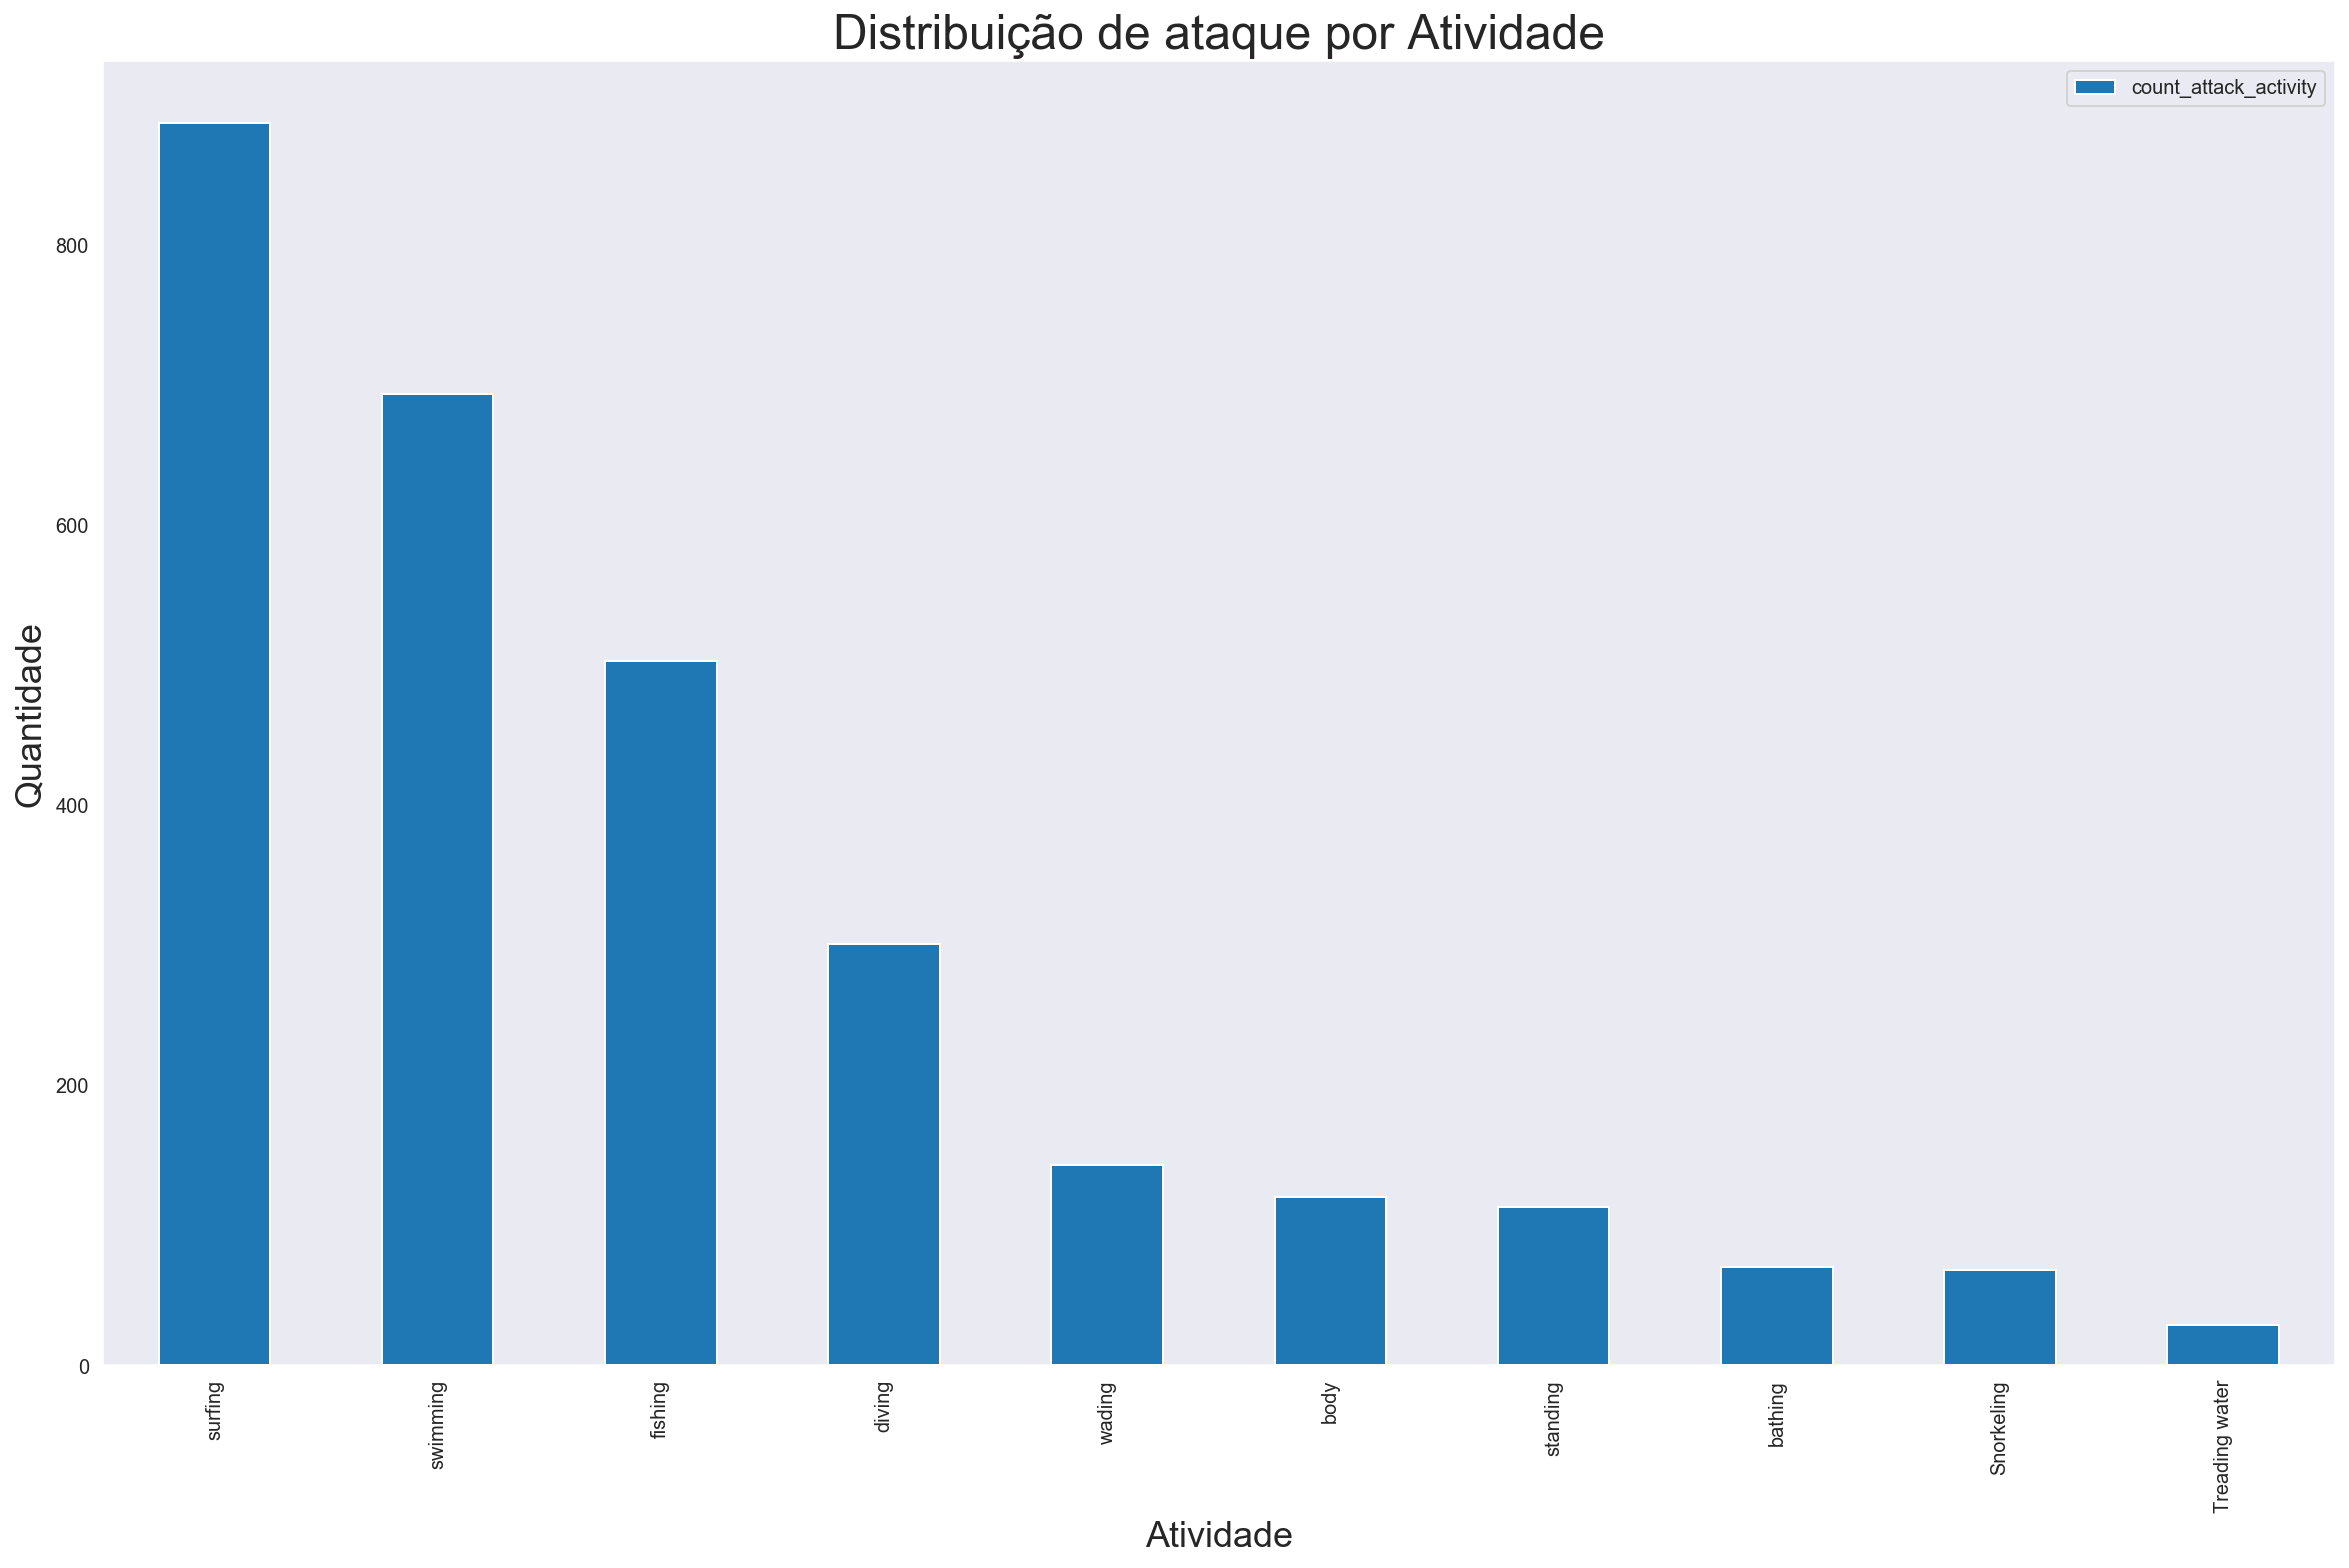

In [329]:
tb_activity_estudo.sort_values(by=['count_attack_activity'], ascending=False).head(10).plot.bar(x="activity_cons", y='count_attack_activity' )
plt.title("Distribuição de ataque por Atividade", fontsize='24')
plt.xlabel("Atividade", fontsize='18')
plt.ylabel("Quantidade", fontsize='18')

## Categorizing age group, I decided to create 10 groups, to understanding better. Not found an study that could help with categorizing, so I used the data on DataFrame to create these groups

In [330]:
tb_sharkattack_new['age_interval'] = pd.cut(tb_sharkattack_new['new_age'], 10)

## Organing on Table whith TOP 5 species and Activity per age group

In [331]:
# creating variable of total of case per SCPECIES 
total_white = sum(tb_sharkattack_new.loc[filter_white, 'age_interval'].value_counts()) 
tb_white = pd.DataFrame(tb_sharkattack_new.loc[filter_white, 'age_interval'].value_counts())
total_bull = sum(tb_sharkattack_new.loc[filter_bull, 'age_interval'].value_counts()) 
tb_bull = pd.DataFrame(tb_sharkattack_new.loc[filter_bull, 'age_interval'].value_counts())
total_tiger = sum(tb_sharkattack_new.loc[filter_tiger, 'age_interval'].value_counts()) 
tb_tiger = pd.DataFrame(tb_sharkattack_new.loc[filter_tiger, 'age_interval'].value_counts())
total_tiger = sum(tb_sharkattack_new.loc[filter_tiger, 'age_interval'].value_counts()) 
tb_tiger = pd.DataFrame(tb_sharkattack_new.loc[filter_tiger, 'age_interval'].value_counts())
total_blacktip = sum(tb_sharkattack_new.loc[filter_blacktip, 'age_interval'].value_counts()) 
tb_blacktip = pd.DataFrame(tb_sharkattack_new.loc[filter_blacktip, 'age_interval'].value_counts())
total_nurse = sum(tb_sharkattack_new.loc[filter_nurse, 'age_interval'].value_counts()) 
tb_nurse = pd.DataFrame(tb_sharkattack_new.loc[filter_nurse, 'age_interval'].value_counts())


# creating variable of total of case per SPORTS
total_surfing = sum(tb_sharkattack_new.loc[filter_surfing, 'age_interval'].value_counts()) 
tb_surfing = pd.DataFrame(tb_sharkattack_new.loc[filter_surfing, 'age_interval'].value_counts())
total_swimming = sum(tb_sharkattack_new.loc[filter_swimming, 'age_interval'].value_counts()) 
tb_swimming = pd.DataFrame(tb_sharkattack_new.loc[filter_swimming, 'age_interval'].value_counts())
total_fishing = sum(tb_sharkattack_new.loc[filter_fishing, 'age_interval'].value_counts()) 
tb_fishing = pd.DataFrame(tb_sharkattack_new.loc[filter_fishing, 'age_interval'].value_counts())
total_diving = sum(tb_sharkattack_new.loc[filter_diving, 'age_interval'].value_counts()) 
tb_diving = pd.DataFrame(tb_sharkattack_new.loc[filter_diving, 'age_interval'].value_counts())
total_wading = sum(tb_sharkattack_new.loc[filter_wading, 'age_interval'].value_counts()) 
tb_wading = pd.DataFrame(tb_sharkattack_new.loc[filter_wading, 'age_interval'].value_counts())

# creating variable of total of case p
total_geral = sum(tb_sharkattack_new['age_interval'].value_counts()) 
tb_geral = pd.DataFrame(tb_sharkattack_new['age_interval'].value_counts())
                                                                                        

In [332]:
tb_white['total_white'] = total_white
tb_bull['total_bull'] = total_bull
tb_tiger['total_tiger'] = total_tiger
tb_blacktip['total_blacktip'] = total_blacktip
tb_nurse['total_nurse'] = total_nurse

tb_surfing['total_surfing'] = total_surfing
tb_swimming['total_swimming'] = total_swimming
tb_diving['total_diving'] = total_diving
tb_wading['total_wading'] = total_wading
tb_fishing['total_fishing'] = total_fishing

tb_geral['total_geral'] = total_geral

In [333]:
tb_white['prop_white'] = tb_white['age_interval'] / tb_white['total_white']
tb_bull['prop_bull'] = tb_bull['age_interval'] / tb_bull['total_bull']
tb_tiger['prop_tiger'] = tb_tiger['age_interval'] / tb_tiger['total_tiger']
tb_blacktip['prop_blacktip'] = tb_blacktip['age_interval'] / tb_blacktip['total_blacktip']
tb_nurse['prop_nurse'] = tb_nurse['age_interval'] / tb_nurse['total_nurse']

tb_surfing['prop_surfing'] = tb_surfing['age_interval'] / tb_surfing['total_surfing']
tb_swimming['prop_swimming'] = tb_swimming['age_interval'] / tb_swimming['total_swimming']
tb_wading['prop_wading'] = tb_wading['age_interval'] / tb_wading['total_wading']
tb_diving['prop_diving'] = tb_diving['age_interval'] / tb_diving['total_diving']
tb_fishing['prop_fishing'] = tb_fishing['age_interval'] / tb_fishing['total_fishing']
tb_geral['prop_geral'] = tb_geral['age_interval'] / tb_geral['total_geral']

In [334]:
tb_white = tb_white.rename({'age_interval': 'age_count_white'}, axis =1)
tb_bull = tb_bull.rename({'age_interval': 'age_count_bull'}, axis =1)
tb_tiger = tb_tiger.rename({'age_interval': 'age_count_tiger'}, axis =1)
tb_blacktip = tb_blacktip.rename({'age_interval': 'age_count_blacktip'}, axis =1)
tb_nurse = tb_nurse.rename({'age_interval': 'age_count_nurse'}, axis =1)

tb_surfing = tb_surfing.rename({'age_interval': 'age_count_surfing'}, axis =1)
tb_swimming = tb_swimming.rename({'age_interval': 'age_count_swimming'}, axis =1)
tb_diving = tb_diving.rename({'age_interval': 'age_count_diving'}, axis =1)
tb_wading = tb_wading.rename({'age_interval': 'age_count_wading'}, axis =1)
tb_fishing = tb_fishing.rename({'age_interval': 'age_count_fishing'}, axis =1)
tb_geral = tb_geral.rename({'age_interval': 'age_count_geral'}, axis =1)



In [335]:

tb_white = tb_white.reset_index()
tb_bull = tb_bull.reset_index()
tb_tiger = tb_tiger.reset_index()
tb_blacktip = tb_blacktip.reset_index()
tb_nurse = tb_nurse.reset_index()

tb_surfing = tb_surfing.reset_index()
tb_swimming = tb_swimming.reset_index()
tb_wading = tb_wading.reset_index()
tb_diving = tb_diving.reset_index()
tb_fishing = tb_fishing.reset_index()


tb_geral = tb_geral.reset_index()

In [336]:
tb_age_stats= tb_geral.merge(tb_white, on = 'index')
tb_age_stats= tb_age_stats.merge(tb_bull, on = 'index')
tb_age_stats= tb_age_stats.merge(tb_tiger, on = 'index')
tb_age_stats= tb_age_stats.merge(tb_blacktip, on = 'index')
tb_age_stats= tb_age_stats.merge(tb_nurse, on = 'index')

tb_age_stats= tb_age_stats.merge(tb_surfing, on = 'index')
tb_age_stats= tb_age_stats.merge(tb_swimming, on = 'index')
tb_age_stats= tb_age_stats.merge(tb_wading, on = 'index')
tb_age_stats= tb_age_stats.merge(tb_diving, on = 'index')
tb_age_stats= tb_age_stats.merge(tb_fishing, on = 'index')



Text(0, 0.5, 'Proporção')

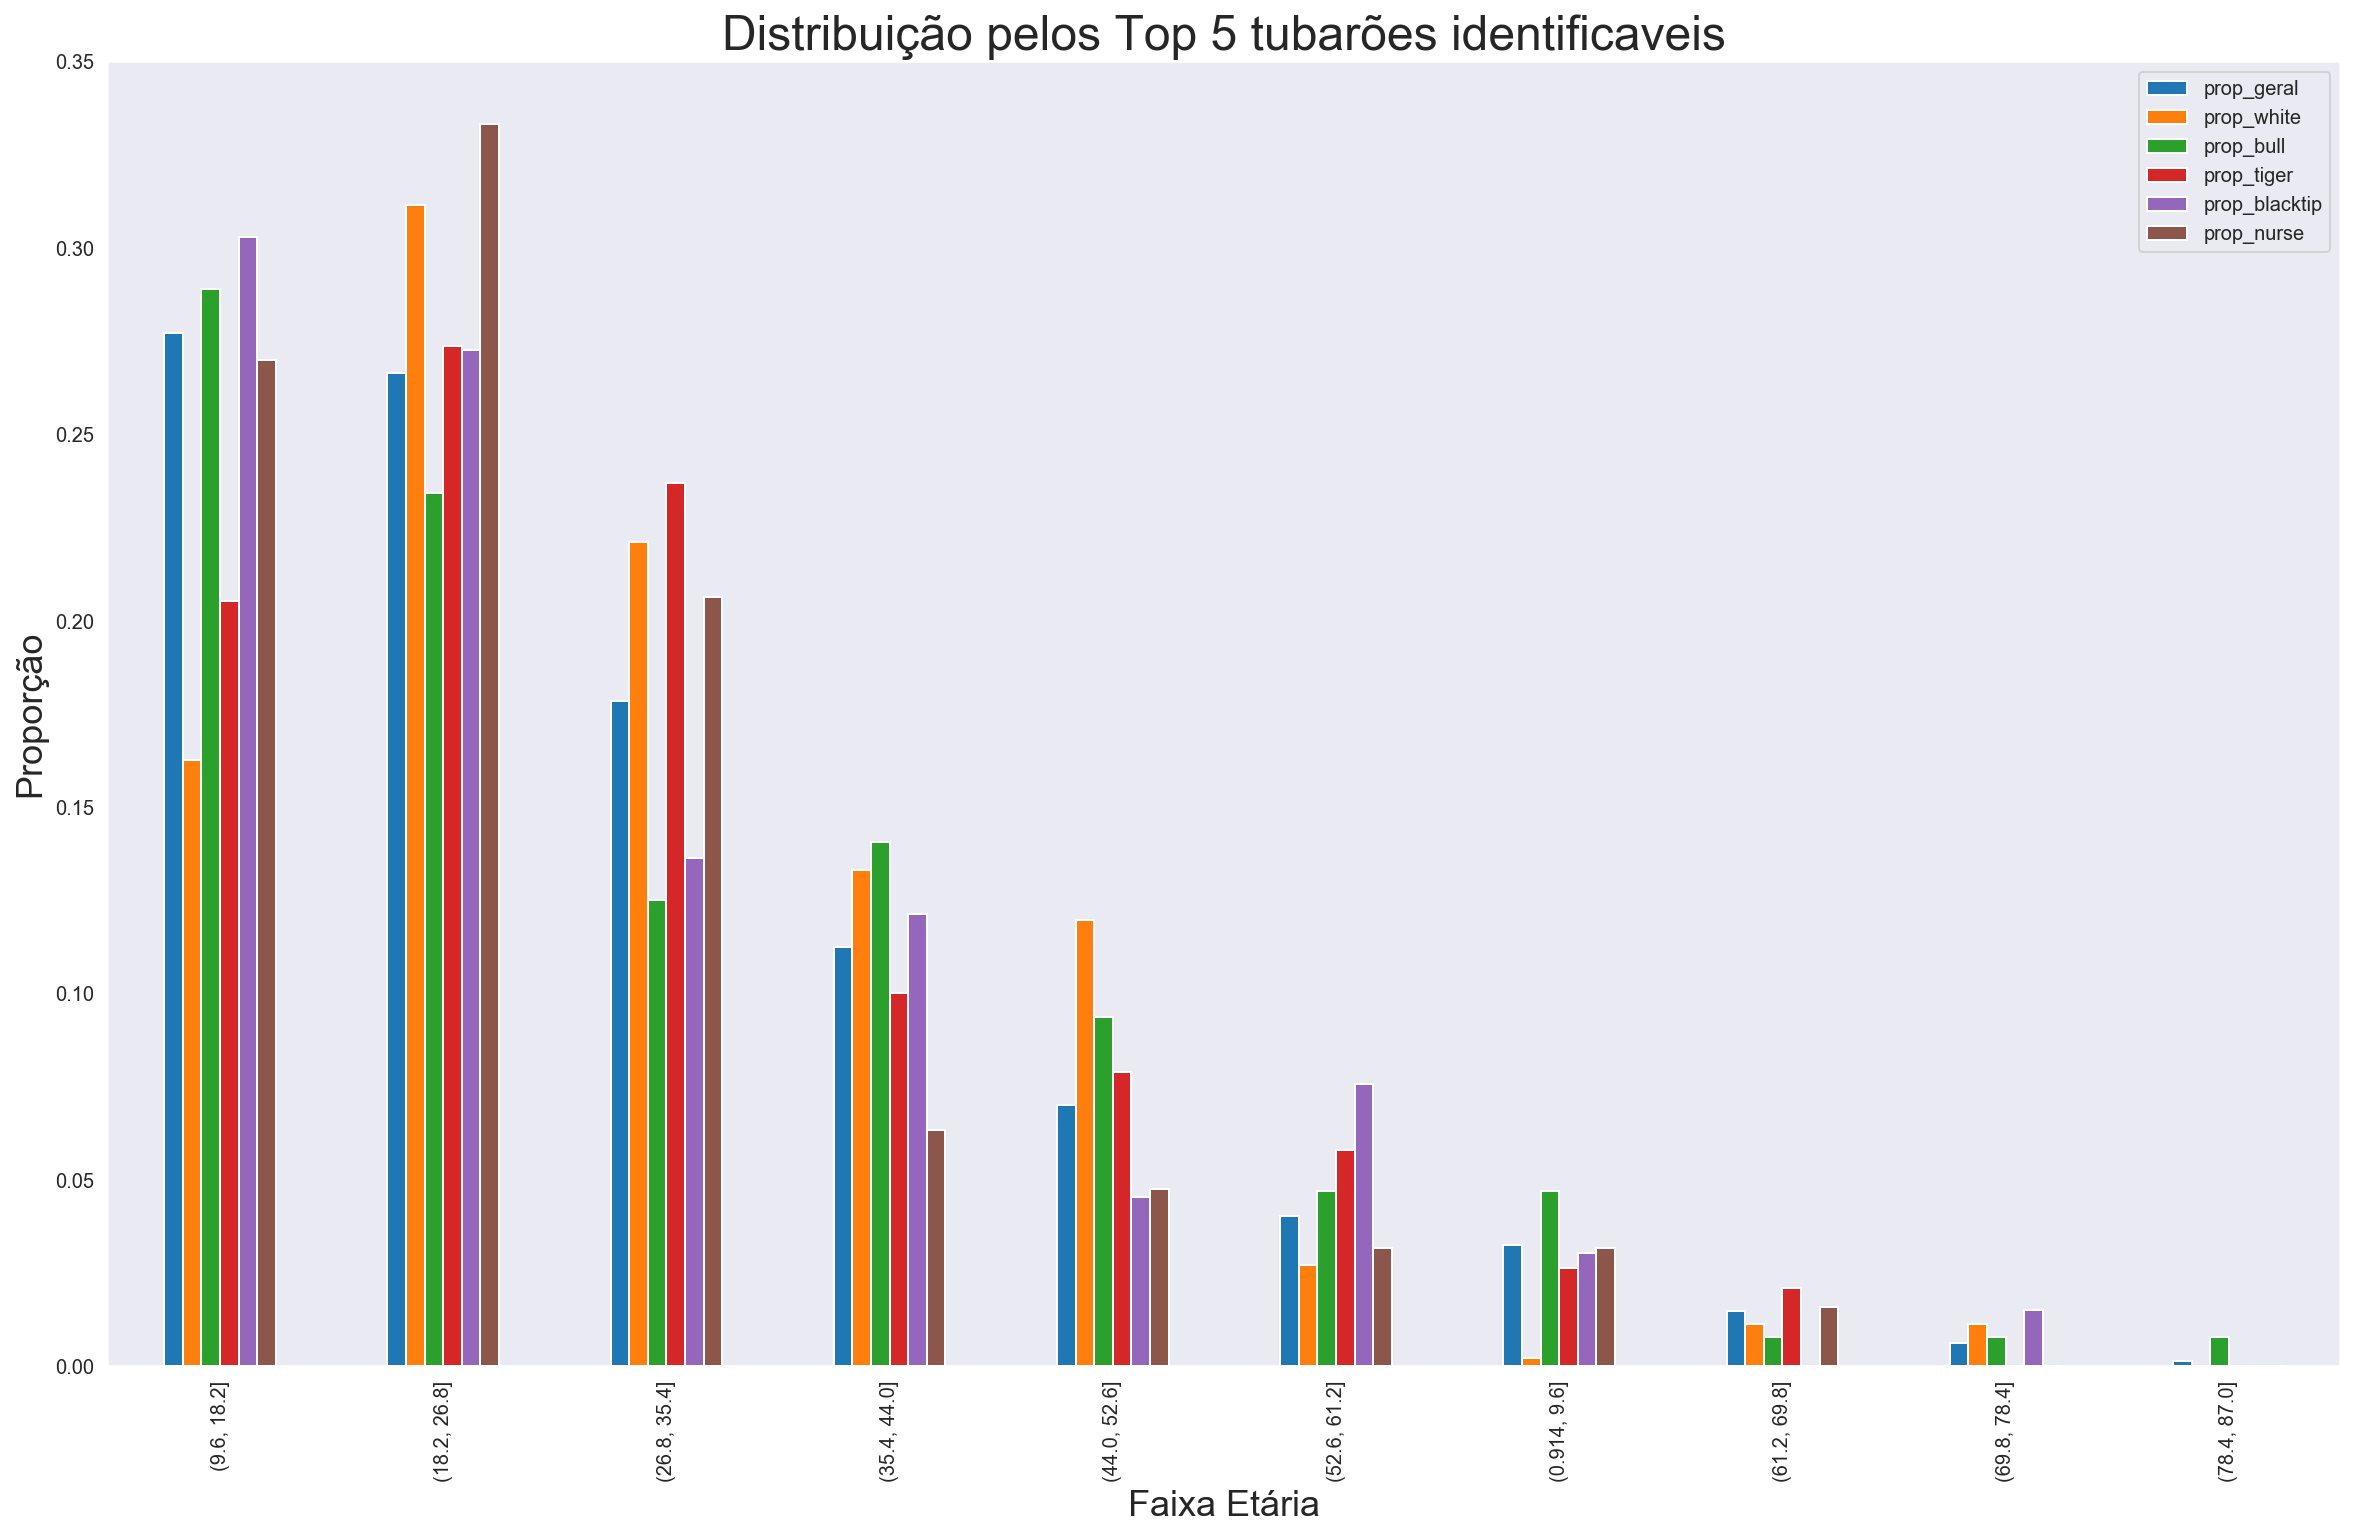

In [228]:
tb_age_stats.plot.bar(x="index", y=['prop_geral', 'prop_white', 'prop_bull', 'prop_tiger', 'prop_blacktip', 'prop_nurse' ] )
plt.title("Distribuição pelos Top 5 tubarões identificaveis", fontsize='24')
plt.xlabel("Faixa Etária", fontsize='18')
plt.ylabel("Proporção", fontsize='18')




In [360]:
tb_age_stats[['index', 'prop_surfing', 'prop_swimming', 'prop_diving', 'prop_fishing']]

,index,prop_surfing,prop_swimming,prop_diving,prop_fishing
0,"(9.6, 18.2]",0.296505,0.347763,0.116279,0.139165
1,"(18.2, 26.8]",0.311161,0.264069,0.229236,0.274354
2,"(26.8, 35.4]",0.174746,0.124098,0.292359,0.270378
3,"(35.4, 44.0]",0.109357,0.075036,0.162791,0.153082
4,"(44.0, 52.6]",0.063134,0.067821,0.116279,0.089463
5,"(52.6, 61.2]",0.027057,0.046176,0.056478,0.045726
6,"(0.914, 9.6]",0.011274,0.044733,0.006645,0.005964
7,"(61.2, 69.8]",0.005637,0.020202,0.016611,0.007952
8,"(69.8, 78.4]",0.001127,0.007215,0.003322,0.011928
9,"(78.4, 87.0]",0.000000,0.002886,0.000000,0.001988


In [ ]:
for col in tb_age_stats.columns: 
    print(col)

In [ ]:
tb_age_stats.corr()

Text(0, 0.5, 'Proporção')

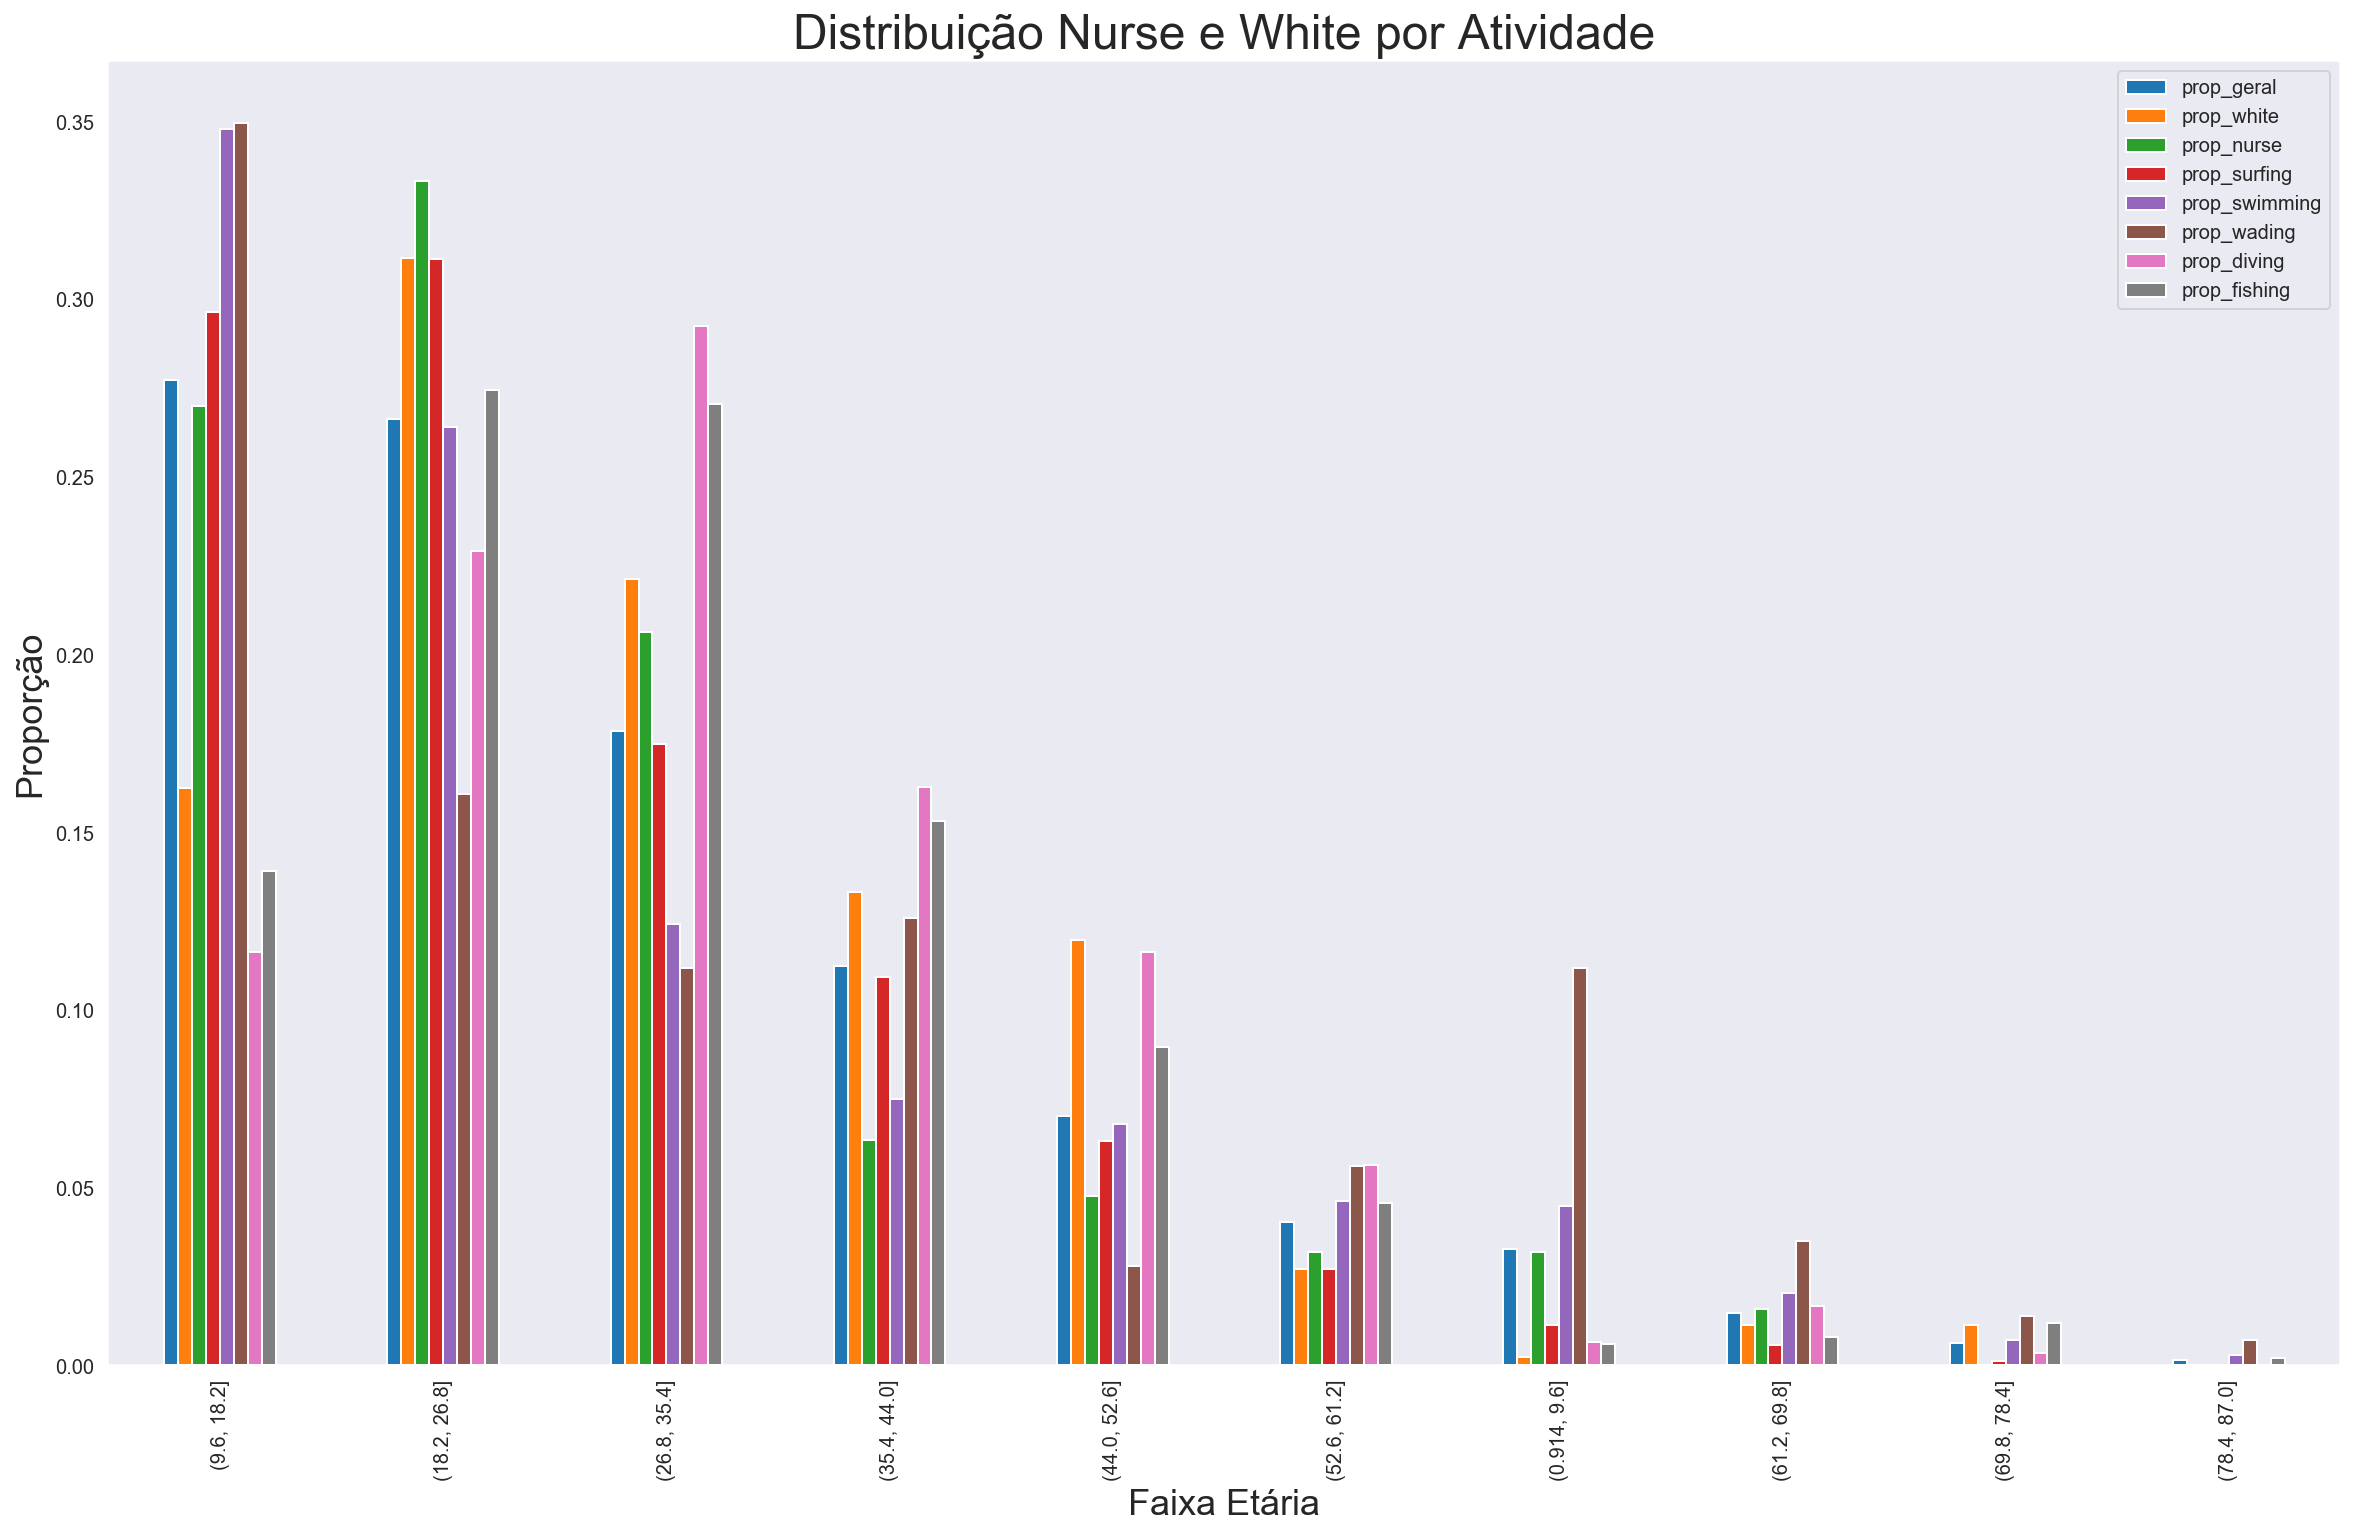

In [338]:
tb_age_stats.plot.bar(x="index", y=['prop_geral', 'prop_white', 'prop_nurse', 'prop_surfing', 
                                    'prop_swimming', 'prop_wading', 'prop_diving', 'prop_fishing'] )
plt.title("Distribuição Nurse e White por Atividade", fontsize='24')
plt.xlabel("Faixa Etária", fontsize='18')
plt.ylabel("Proporção", fontsize='18')



In [ ]:
tb_geral

In [ ]:
tb_white

In [ ]:
tb_tiger

In [ ]:
tb_blacktip.reset_index()

In [ ]:
tb_bull

In [ ]:
tb_surfing

In [ ]:
tb_swimming

In [ ]:
tb_sharkattack_new

In [349]:
tb_teste = pd.DataFrame(tb_sharkattack_new.loc[filter_white, 'age_interval'].value_counts())

In [350]:
tb_teste

,age_interval
"(18.2, 26.8]",138
"(26.8, 35.4]",98
"(9.6, 18.2]",72
"(35.4, 44.0]",59
"(44.0, 52.6]",53
"(52.6, 61.2]",12
"(69.8, 78.4]",5
"(61.2, 69.8]",5
"(0.914, 9.6]",1
"(78.4, 87.0]",0
